<a href="https://colab.research.google.com/github/eugeinga/CODER-DataScienceII/blob/main/DataScienceII_EugeniaIngaramo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Portada](https://github.com/eugeinga/CODER-DataScienceII/raw/main/IMG/IMG-BannerCODER.jpg)

# **DATA SCIENCE II: Machine Learning para la Ciencia de Datos**


* **Comisión:** 61605
* **Profesor:** Jorge Ruiz
* **Tutor:** Mateo Bongiorno / Anderson Ocaña
* **Estudiante:** [Eugenia Ingaramo](https://www.linkedin.com/in/eugeniaingaramo/)

## **PROYECTO FINAL (Pre-entrega): Análisis de la calidad de vinos de Portugal**

### **🌀 Introducción**

Mediante este proyecto se pretende analizar los datos vinculados a la calidad de los vinos de Portugal. Para ello, se plantearán distintas hipótesis que serán evaluadas mediante análisis estadístico. Se espera, además, identificar patrones y/o tendencias que pudieran predecir la calificación promedio de un vino.
![Datset Cover](https://github.com/eugeinga/CODER-DataScienceII/raw/main/IMG/IMG-dataset-cover.jpg)

### **🌀 Acerca del set de datos**

##### **Wine Quality Data Set (Red & White Wine):** <https://www.kaggle.com/datasets/ruthgn/wine-quality-data-set-red-white-wine>

Este conjunto de datos contiene registros relacionados con las variedades tinto y blanco del vino Vinho Verde portugués. Contiene información de 1599 muestras de vino tinto y 4898 muestras de vino blanco.

Las variables de entrada en el conjunto de datos consisten en el tipo de vino (tinto o blanco) y métricas de pruebas objetivas (por ejemplo, niveles de acidez, valores de PH, ABV, etc.), mientras que la variable objetivo/salida es una puntuación numérica basada en datos sensoriales (de al menos 3 evaluaciones realizadas por expertos en vino). Cada experto calificó la calidad del vino entre 0 (muy mala) y 10 (muy excelente).

Por cuestiones de privacidad y logística, no hay datos sobre tipos de uva, marca de vino y precio de venta del vino.

### **🌀 Hipótesis**

Se establecen las siguientes hipótesis:
* La acidez fija y la acidez volátil tienen una correlación significativa con la calidad del vino.
* Niveles altos de dióxido de azufre (libre y total) afectan negativamente la calidad del vino.
* Las características químicas que más influyen en la calidad varían entre vinos blancos y tintos.

## **PROCESAMIENTO DE DATOS**

In [104]:
import pandas as pd                             # manejo de datos
import numpy as np                              # manejo de arreglos
import seaborn as sns                           # visualización de gráficos
from seaborn import lmplot
import matplotlib.pyplot as plt                 # visualización de gráficos
#import matplotlib.style as style
import missingno as msno                        # visualización de datos faltantes
from sklearn.preprocessing import LabelEncoder  # conversión de variables categóricas
from scipy.stats import shapiro                 # Test estadístico de Normalidad
import statsmodels.api as sm                    # Gráfico QQ-Plot

#warnings.filterwarnings("ignore")

sns.set_theme(style="whitegrid", palette="pastel") # Estilo de seaborn
#sns.color_palette()
#sns.color_palette(palette='pastel', as_cmap=True)

### **1️⃣ Adquisición de Datos**
---




In [105]:
# Lectura del dataset

url="https://raw.githubusercontent.com/eugeinga/CODER-DataScienceII/main/DATASET/winequalityN.csv"
df=pd.read_csv(url,sep=',',header=0)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### **2️⃣ Data Wrangling**
---
El **Data Wrangling** consiste en limpiar, transformar y estructurar los datos para que sean más utilizables y valiosos. Este proceso es esencial porque los datos en su forma original a menudo están desordenados, incompletos o contienen errores que pueden afectar la calidad del análisis.

Como parte de esta etapa se procederá a:
- Identificar valores duplicados
- Identificar valores faltantes
- Formatear de datos
- Transformar datos (normalización, estandarización, etc.).

En este caso se trabaja con un único dataset por lo que no será necesario combinar/concatenar ficheros.

### **🔹 Variables bajo estudio**


| VARIABLE             | DECRIPCION              | MIN     | MAX       | RANGO TIPICO  |
|----------------------|-------------------------|---------|-----------|---------------|
| **type** | Tipo de vino |   |   | Blanco /Negro |
| **fixed acidity**        | Acidez fija             | 4.0 g/L | 16.0 g/L  | 4.0 - 9.0 g/L |
| **volatile acidity**     | Acidez volátil          | 0.1 g/L | 1.6 g/L   | 0.2 - 1.0 g/L |
| **citric acid** | Acido cítrico | 0.0 g/L  | 1.6 mg/L  | 0 - 0.5 g/L |
| **residual sugar** | Azúcar residual | 0.1 g/L  | 45 g/L  | 0.9 - 15.5 mg/L |
| **chlorides** | Cloruros | 0.009 g/L  | 0.6 g/L  | 0.01 - 0.2 mg/L |
| **free sulful dioxide** | Dioxido de azufre libre | 1 mg/L  | 70 mg/L  | 10 - 50 mg/L |
| **total sulful dioxide** | Dioxido de azufre total | 6 mg/L  | 350 mg/L  | 50 - 150 mg/L |
| **density** | Densidad | 0.90 g/cm³  | 1.01 g/cm³  | 0.99 - 1.00 g/cm³ |
| **pH** | pH | 2.75  | 4.00  | 3.00 - 4.00 |
| **sulphates** | Sulfatos | 0.3 g/L  | 2.0 g/L  | 0.3 - 0.6 g/L |
| **alcohol** | Alcohol | 8 %  | 15 %  | 11 - 14 % |
| **quality** | Calidad | 1  | 10  | 1 - 10 |




* **Acidez fija:** La acidez fija es responsable del sabor ácido del vino. Los vinos con una acidez fija en el rango rípico suelen tener un sabor fresco y equilibrado. Los valores más altos son más comunes en vinos blancos y espumosos.
* **Acidez volátil:** Niveles altos de acidez volátil pueden dar un sabor avinagrado al vino, lo cual generalmente es un defecto.
* **Ácido cítrico:**	Es un ácido que agrega frescura y un sabor afrutado al vino. Su presencia en pequeñas cantidades es deseable.
* **Azúcar residual:**	Es el azúcar que queda en el vino después de la fermentación. Los vinos con menos azúcar residual son secos, mientras que los vinos con más azúcar residual son dulces.
* **Cloruros:**	Se refiere al contenido de sal en el vino, que puede influir en su sabor y cuerpo. Niveles altos pueden dar un sabor salado, lo que generalmente es indeseable.
* **Dióxido de azufre libre:**	Es el dióxido de azufre que no está ligado a otros compuestos en el vino y actúa como un conservante, ayudando a prevenir la oxidación y el crecimiento microbiano. Los vinos blancos y rosados suelen requerir más dióxido de azufre libre que los tintos.
* **Dióxido de azufre total:**	Es la suma del dióxido de azufre libre y el combinado. Un nivel adecuado es importante para la conservación del vino, pero niveles demasiado altos pueden causar un sabor fuerte y desagradable. Los valores máximos permitidos varían según la legislación de cada país, generalmente se permite hasta 200 mg/L para vinos tintos y hasta 350 mg/L para vinos blancos y rosados.
* **Densidad:**	Se refiere a la relación entre la masa y el volumen del vino. Está estrechamente relacionada con el contenido de azúcar y alcohol; un vino más dulce o con más alcohol generalmente tendrá mayor densidad. Los vinos secos tienden a estar más cerca del rango inferior, mientras que los vinos dulces están en el extremo superior.
* **pH:**	Mide la acidez o alcalinidad del vino. Un pH bajo (común en vinos blancos) indica alta acidez, lo que contribuye a la frescura y estabilidad del vino.
* **Sulfatos:**	Los sulfatos, como el sulfato de potasio, son aditivos que pueden usarse para estabilizar el vino y mejorar su claridad. En cantidades excesivas pueden influir negativamente en el sabor y la sensación en boca.
* **Alcohol:**	Indica el porcentaje de alcohol por volumen en el vino. Afecta el cuerpo, el sabor y la percepción general del vino. Un vino con más alcohol puede parecer más cálido y robusto. Los vinos de mesa suelen estar en el rango de 11% a 14%.
* **Calidad:**	Este es un valor subjetivo basado en una evaluación sensorial y puede variar ampliamente según el catador y el tipo de vino. Un vino de alta calidad generalmente estará en el rango de 7 a 10.

In [106]:
# Información de resumen del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [107]:
# Dimensiones del dataset [filas, columnas]
df.shape

(6497, 13)

El dataset bajo estudio cuenta con 6497 filas y 13 columnas de las cuales 12 corresponden a variables independientes a analizar y 1 a la variable dependiente u objetivo.

## **🔹 Valores Duplicados**

##### Se eliminan los registros duplicados

In [108]:
print("Dimensiones del dataset original: ", df.shape)
df.duplicated().value_counts()
df.drop_duplicates(inplace=True)
print("Dimensiones del dataset sin filas duplicadas: ", df.shape)

Dimensiones del dataset original:  (6497, 13)
Dimensiones del dataset sin filas duplicadas:  (5329, 13)


##### El dataset tiene 1170 filas duplicadas que son eliminadas dado que a los fines de este trabajo (predecir la calidad de los vinos) entradas idénticas no aportan valor; de esta manera, el dataset resultante posee 5327 filas y 13 columnas.

## **🔹 Valores faltantes**

Se identifican los valores nulos en cada una de las columnas del dataset y se rellenan con la media de cada variable según tipo de vino y calidad.

In [109]:
# Contabilizo los datos nulos/faltantes por columna.

pd.DataFrame({'Cant.NAN' : df.isna().sum(), '%NAN' : df.isna().sum() / len(df) * (100)}).round(2)

,Cant.NAN,%NAN
type,0,0.00
fixed acidity,10,0.19
volatile acidity,8,0.15
citric acid,3,0.06
residual sugar,2,0.04
chlorides,2,0.04
free sulfur dioxide,0,0.00
total sulfur dioxide,0,0.00
density,0,0.00
pH,9,0.17


<Axes: >

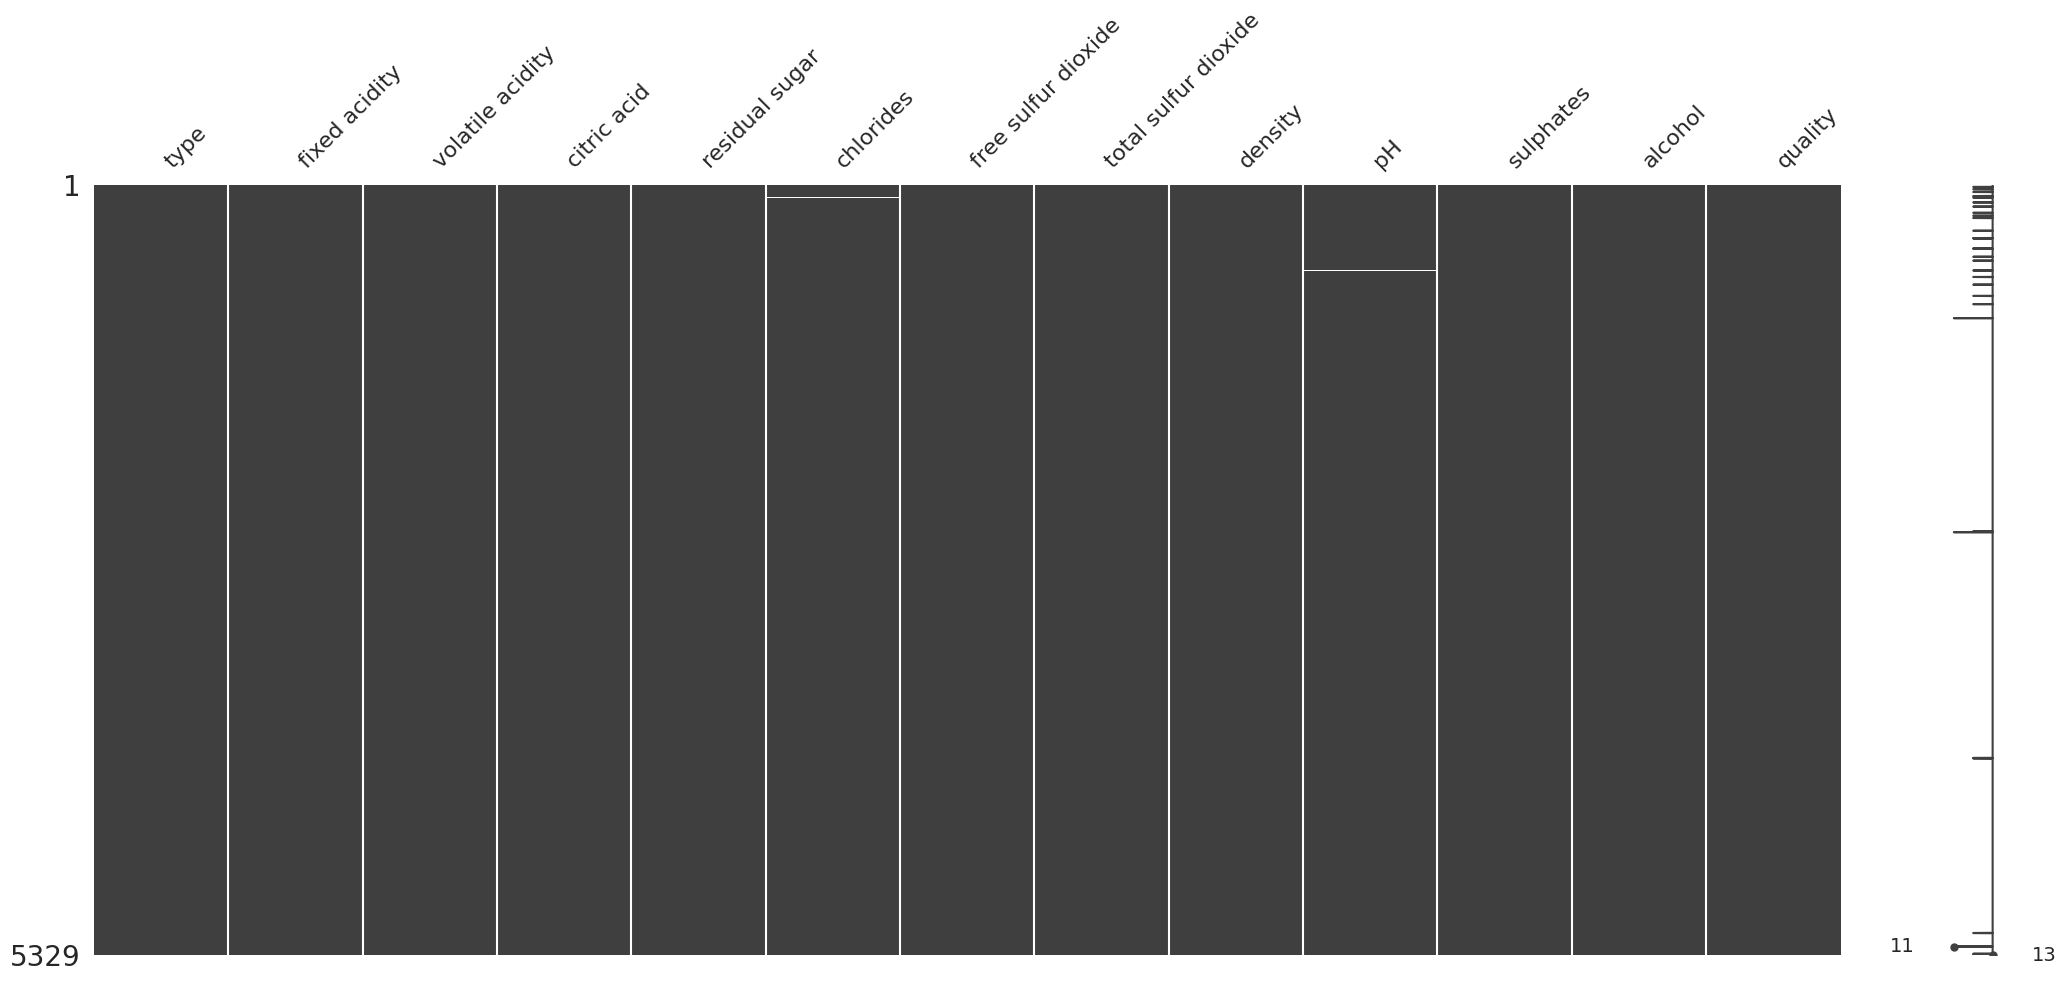

In [110]:
msno.matrix(df)

In [111]:
# Calculo los valores promedio de cada variable según tipo y calificación del vino.
df.groupby(by=['type', 'quality']).mean().round(2)

fixed acidity  volatile acidity  citric acid  residual sugar  \
type  quality                                                                 
red   3                 8.36              0.88         0.17            2.64   
      4                 7.78              0.69         0.17            2.69   
      5                 8.17              0.58         0.24            2.51   
      6                 8.34              0.50         0.28            2.46   
      7                 8.86              0.40         0.37            2.72   
      8                 8.44              0.43         0.38            2.58   
white 3                 7.60              0.33         0.34            6.39   
      4                 7.14              0.38         0.31            4.50   
      5                 6.92              0.30         0.34            6.95   
      6                 6.82              0.26         0.34            5.97   
      7                 6.70              0.27         0.33            4.52   
      8                 6.61              0.29         0.34            5.03   
      9                 7.42              0.30         0.39            4.12   

               chlorides  free sulfur dioxide  total sulfur dioxide  density  \
type  quality                                                                  
red   3             0.12                11.00                 24.90     1.00   
      4             0.09                12.26                 36.25     1.00   
      5             0.09                17.16                 57.41     1.00   
      6             0.09                15.64                 40.82     1.00   
      7             0.08                13.99                 35.45     1.00   
      8             0.07                13.76                 34.47     1.00   
white 3             0.05                53.32                170.60     0.99   
      4             0.05                23.13                124.13     0.99   
      5             0.05                36.00                150.14     1.00   
      6             0.05                35.33                136.53     0.99   
      7             0.04                33.91                122.19     0.99   
      8             0.04                35.57                121.68     0.99   
      9             0.03                33.40                116.00     0.99   

                 pH  sulphates  alcohol  
type  quality                            
red   3        3.40       0.57     9.96  
      4        3.38       0.60    10.27  
      5        3.30       0.62     9.89  
      6        3.32       0.67    10.66  
      7        3.29       0.74    11.49  
      8        3.27       0.77    12.16  
white 3        3.19       0.47    10.34  
      4        3.19       0.48    10.20  
      5        3.17       0.48     9.86  
      6        3.20       0.49    10.64  
      7        3.23       0.50    11.51  
      8        3.24       0.49    11.89  
      9        3.31       0.47    12.18

In [112]:
# Reemplazo los datos faltantes con la media de cada columna según tipo de vino y calidad.

valoresPromedio = df.groupby(['type', 'quality']).transform('mean').round(2)
#print(valoresPromedio)
df.fillna(valoresPromedio, inplace=True)
print(df.isna().sum())

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


## **🔹 Valores sospechosos**

##### Se consideran valores sospechosos los siguientes:
* los valores en cero (a excepción de 'ácido cítrico'),
* los valores negativos (aunque según los datos estadísticos no hay columnas con valores mínimos negativos).

In [113]:
# Se contabilizan los datos que son menores o igual a 0 (cero) en las columnas que según el ambito de estudio no admiten valores ceros o negativos.

valoresnulos = (df[['fixed acidity','volatile acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']] <= 0).sum()
print(valoresnulos)

fixed acidity           0
volatile acidity        0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64


No hay datos nulos o menores a 0 (cero) en las columnas que según el ambito de estudio no admiten valores ceros o negativos.

Coeficiente de variación (CV) de las distintas columnas

In [114]:
# Calculo el coeficiente de variación (CV) a fin de determinar la dispersión de los conjuntos de datos respecto a la media.
# Si el CV es <= 30% se dice que los datos son relativamente homogéneos.

encabezados = df.columns.values[1:]

for i in range(len(encabezados)):
  coefVar = (df[encabezados[i]].std() / df[encabezados[i]].mean()) * 100
  print(f"CV {encabezados[i]}: {coefVar.round(2)}")


CV fixed acidity: 18.27
CV volatile acidity: 48.87
CV citric acid: 46.14
CV residual sugar: 89.1
CV chlorides: 65.01
CV free sulfur dioxide: 59.27
CV total sulfur dioxide: 49.73
CV density: 0.3
CV pH: 4.97
CV sulphates: 28.07
CV alcohol: 11.24
CV quality: 15.18


In [115]:
df.nunique()

,0
type,2
fixed acidity,111
volatile acidity,187
citric acid,89
residual sugar,318
chlorides,214
free sulfur dioxide,135
total sulfur dioxide,276
density,998
pH,108


## **🔹 Cardinalidad de las variables**

In [116]:
# Cardinalidad de las variables

cardinalidad = pd.DataFrame({'Cantidad' : df.nunique(), 'Porcentaje' : (df.nunique()) / (df.shape[0]) * (100)}).round(2)
cardinalidad

,Cantidad,Porcentaje
type,2,0.04
fixed acidity,111,2.08
volatile acidity,187,3.51
citric acid,89,1.67
residual sugar,318,5.97
chlorides,214,4.02
free sulfur dioxide,135,2.53
total sulfur dioxide,276,5.18
density,998,18.73
pH,108,2.03


## **🔹 Agrupacion de Características (Feature Binning)**

A fin de facilitar el análisis de los datos se dividen las calidades en intervalos discretos no superpuestos (bins).

In [117]:
df.quality.unique()

array([6, 5, 7, 8, 4, 3, 9])

In [118]:
# Analizo la distribucion de los vinos por tipo y calidad.

#df.pivot_table(df, index=['type'], aggfunc='mean').round(2)

#pivot_df = df.pivot_table(index=['type','quality'], aggfunc='size')
pivot_df = df.pivot_table(index='type',columns='quality', aggfunc='size')
#pivot_df = df.pivot_table(index=['type', 'quality'], aggfunc='size').reset_index(name='count')

print(pivot_df)

quality     3      4       5       6      7      8    9
type                                                   
red      10.0   53.0   577.0   535.0  167.0   17.0  NaN
white    20.0  153.0  1178.0  1792.0  690.0  132.0  5.0


In [119]:
# Otra forma de agrupar los datos

df.groupby(['type', 'quality']).size().reset_index(name='counts')

,type,quality,counts
0,red,3,10
1,red,4,53
2,red,5,577
3,red,6,535
4,red,7,167
5,red,8,17
6,white,3,20
7,white,4,153
8,white,5,1178
9,white,6,1792


#### Se recategorizan los vinos en gama Baja, Media, Alta y Superior en función de la calidad de los mismos (discretización).

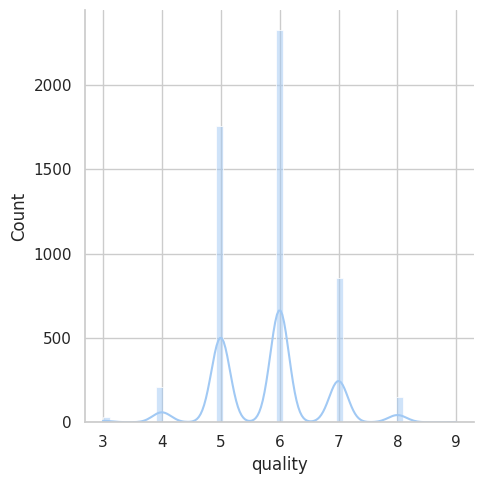

In [120]:
# Analizo la distribución de las calidades de los vinos

from seaborn import displot
displot(df.quality, kind='hist', kde=True)

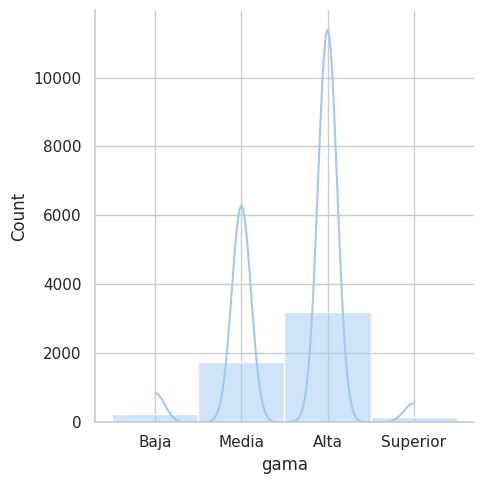

In [121]:
#df['gama'] = df['quality'].apply(lambda x: 'Baja' if x <= 4 else ('Media' if x <= 5 else ('Alta' if x <= 7 else 'Superior')))
#df['gama'] = df.quality.apply(lambda x: 'Baja' if x <= 4 else ('Media' if x <= 5 else ('Alta' if x <= 7 else 'Superior')))
rangos = ["Baja", "Media", "Alta", "Superior"]
df['gama'] = pd.cut(df['quality'], bins=[0, 4, 5, 7, 10], labels=rangos)
#df.head()
displot(df.gama, kind='hist', kde=True)

Totalizo por tipo y gama de vinos

In [122]:
pd.pivot_table(df, index='type', columns='gama', values='quality', aggfunc='count', margins=True, margins_name="TOTAL", observed=False)
#df.pivot_table(index='type', columns='gama', aggfunc='size')

gama,Baja,Media,Alta,Superior,TOTAL
type,,,,,
red,63,577,702,17,1359
white,173,1178,2482,137,3970
TOTAL,236,1755,3184,154,5329


In [123]:
pivot_table = df.pivot_table(index='quality', columns='gama', aggfunc='size', fill_value=0, observed=False)
pivot_table

gama,Baja,Media,Alta,Superior
quality,,,,
3,30,0,0,0
4,206,0,0,0
5,0,1755,0,0
6,0,0,2327,0
7,0,0,857,0
8,0,0,0,149
9,0,0,0,5


Se convierten las variables categóricas en valores numéricos para su posterior uso con los algoritmos de Machine Learning.

In [124]:
# Label encoding

diccionario = {'Baja':1, 'Media':2, 'Alta':3, 'Superior':4}
df['gamaNro'] = df['gama'].map(diccionario)
pd.pivot_table(df, index='type', columns='gamaNro', values='quality', aggfunc='count', margins=True, margins_name="TOTAL", observed=False)

gamaNro,1,2,3,4,TOTAL
type,,,,,
red,63,577,702,17,1359
white,173,1178,2482,137,3970
TOTAL,236,1755,3184,154,5329


In [125]:
df[["type", "gama", "gamaNro"]].dtypes

,0
type,object
gama,category
gamaNro,category


In [126]:
# Instancio el Laber Encoder para la transformación de datos categóricos a valores numéricos

le = LabelEncoder()
df['type'] = le.fit_transform(df['type']).astype(int)
df['gamaNro'] = le.fit_transform(df['gamaNro']).astype(int)
df[["type", "gama", "gamaNro"]].dtypes

# diccionario = {"white":1,"red":0}
#df['type'] = df['type'].map(diccionario)

,0
type,int64
gama,category
gamaNro,int64


In [127]:
df["type"].value_counts() # 0: Red / 1: White

,count
type,
1,3970
0,1359


### **3️⃣ Análisis Exploratorio de Datos (EDA)**
---
Mediante en **Análisis Exploratorio de Datos** se pretende explorar y comprender los datos en detalle a fin de que cualquier análisis posterior sea válido y significativo.

Como parte de esta etapa se procederá a:
- Identificar patrones y tendencias.
- Detectar valores atípicos o anomalías.
- Comprender las relaciones entre diferentes variables.
- Preparar los datos para su transformación, asegurando que estén en el formato adecuado para el análisis.

### **🔹 Análisis Estadístico**


In [128]:
# Separo los dataframes por tipo de vino
df_white = df.loc[df['type'] == 1]
df_red = df.loc[df['type'] == 0]

In [129]:
# Estadística Descriptiva VINOS BLANCOS

df_white.describe().round(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,gamaNro
count,3970.0,3970.00,3970.00,3970.00,3970.00,3970.00,3970.00,3970.00,3970.00,3970.00,3970.00,3970.00,3970.00,3970.00
mean,1.0,6.84,0.28,0.33,5.92,0.05,34.91,137.25,0.99,3.20,0.49,10.59,5.86,1.65
std,0.0,0.87,0.10,0.12,4.86,0.02,17.22,43.13,0.00,0.15,0.11,1.22,0.89,0.62
min,1.0,3.80,0.08,0.00,0.60,0.01,2.00,9.00,0.99,2.72,0.22,8.00,3.00,0.00
25%,1.0,6.30,0.21,0.27,1.60,0.04,23.00,106.00,0.99,3.09,0.41,9.50,5.00,1.00
50%,1.0,6.80,0.26,0.32,4.70,0.04,33.00,133.00,0.99,3.18,0.48,10.40,6.00,2.00
75%,1.0,7.30,0.33,0.39,8.90,0.05,45.00,166.00,1.00,3.29,0.55,11.40,6.00,2.00
max,1.0,14.20,1.10,1.66,65.80,0.35,289.00,440.00,1.04,3.82,1.08,14.20,9.00,3.00


In [130]:
# Estadística Descriptiva VINOS TINTOS

df_red.describe().round(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,gamaNro
count,1359.0,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00
mean,0.0,8.31,0.53,0.27,2.52,0.09,15.89,46.83,1.00,3.31,0.66,10.43,5.62,1.50
std,0.0,1.74,0.18,0.20,1.35,0.05,10.45,33.41,0.00,0.15,0.17,1.08,0.82,0.61
min,0.0,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00,0.00
25%,0.0,7.10,0.39,0.10,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00,1.00
50%,0.0,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00,2.00
75%,0.0,9.20,0.64,0.43,2.60,0.09,21.00,63.00,1.00,3.40,0.73,11.10,6.00,2.00
max,0.0,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00,3.00


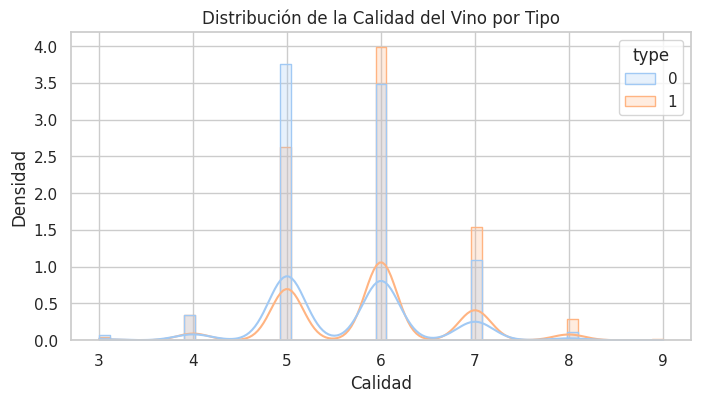

In [131]:
# Comparo la distribución de las calidades de los vinos por tipo de vino

plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='quality', hue='type', kde=True, element="step", stat="density", common_norm=False)
plt.title('Distribución de la Calidad del Vino por Tipo')
plt.xlabel('Calidad')
plt.ylabel('Densidad')
plt.show()

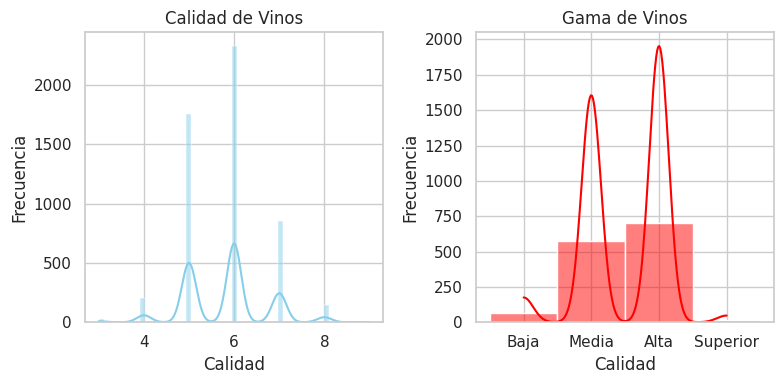

In [132]:
# Comparo la distribución de la variable calidad con la gama de vinos.

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='quality', kde=True, color='skyblue')
plt.title('Calidad de Vinos')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df[df['type'] == 0]['gama'], kde=True, color='red')
plt.title('Gama de Vinos')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'type'}>,
        <Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>],
       [<Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>],
       [<Axes: title={'center': 'quality'}>,
        <Axes: title={'center': 'gamaNro'}>, <Axes: >, <Axes: >]],
      dtype=object)

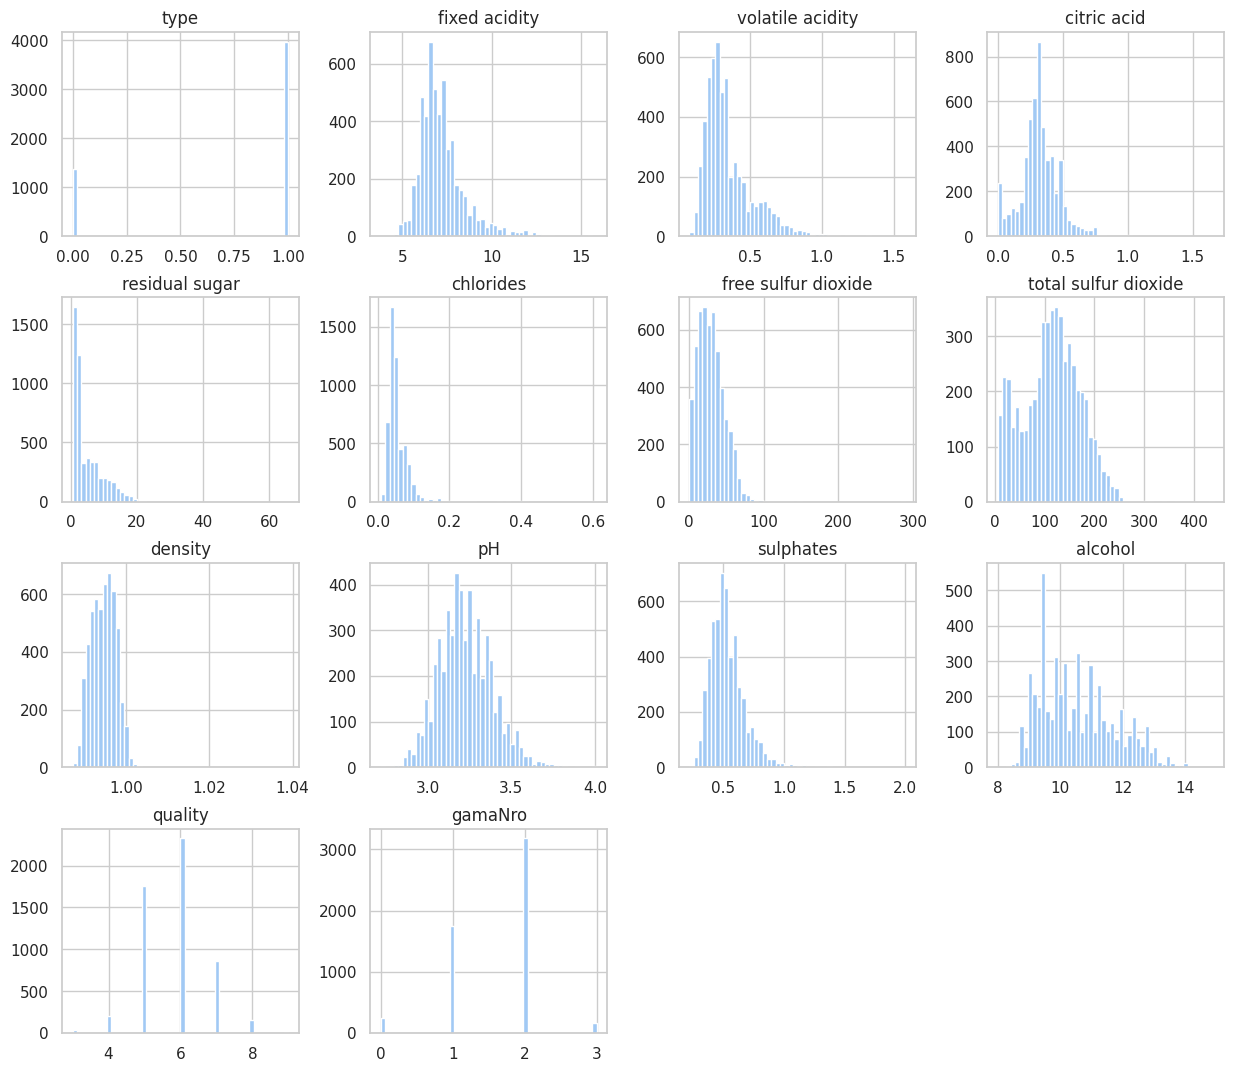

In [133]:
df.hist(figsize=(15,13),bins=50)

Muchas de las variables tienen una distribución asimétrica y/o valores extremos que son analizados en el próximo apartado.

In [134]:
"""
numerical_features = ['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
df_long = pd.melt(df, id_vars=['type'], value_vars=numerical_features, var_name='feature', value_name='value')

for _, feature in enumerate(numerical_features):
    fig, ax = plt.subplots(figsize=(10, 2), sharex=True)
    fig.suptitle(f'Distribución de la variable: {feature}', fontsize=12)
    sns.histplot(data=df_long[df_long['feature'] == feature], x='value', hue='type', kde=True, ax=ax) # Se usa histplot con kde=True para incluir la curva de densidad
    #sns.histplot(df[feature], hue=df['type'], kde=True, ax=ax)  # Se usa histplot con kde=True para incluir la curva de densidad
    #sns.histplot(df[feature], kde=True, ax=ax)  # Se usa histplot con kde=True para incluir la curva de densidad
    #axes[0].grid()
    #axes[1].grid()
    plt.tight_layout() # Ajusta automáticamente la disposición de los elementos en una figura para que se ajusten correctamente y no se superpongan.
    plt.show()
"""

"\nnumerical_features = ['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']\ndf_long = pd.melt(df, id_vars=['type'], value_vars=numerical_features, var_name='feature', value_name='value')\n\nfor _, feature in enumerate(numerical_features):\n    fig, ax = plt.subplots(figsize=(10, 2), sharex=True)\n    fig.suptitle(f'Distribución de la variable: {feature}', fontsize=12)\n    sns.histplot(data=df_long[df_long['feature'] == feature], x='value', hue='type', kde=True, ax=ax) # Se usa histplot con kde=True para incluir la curva de densidad\n    #sns.histplot(df[feature], hue=df['type'], kde=True, ax=ax)  # Se usa histplot con kde=True para incluir la curva de densidad\n    #sns.histplot(df[feature], kde=True, ax=ax)  # Se usa histplot con kde=True para incluir la curva de densidad\n    #axes[0].grid()\n    #axes[1].grid()\n    plt.tight_layout() # Ajusta automáticamente la disposici

Se calcula el coeficiente de variación (CV) a fin de determinar la dispersión de cada variable respecto a la media, tal que, si el CV es <= 30% se dice que los datos son relativamente homogéneos.

<img src="https://github.com/eugeinga/CODER-DataScienceII/raw/main/IMG/IMG-Coeficiente%20de%20Variacion.jpg" alt="Coeficiente de Variacion" width="400"/>

Este valor permitirá comparar la dispersión entre diferentes conjuntos de datos, independientemente de sus unidades de medida.

In [135]:
encabezados = df.columns.tolist()
encabezados.remove('gama')
encabezados.remove('gamaNro')

for i in range(len(encabezados)):
  coefVar = (df[encabezados[i]].std() / df[encabezados[i]].mean()) * 100
  print(f"CV {encabezados[i]}: {coefVar.round(2)}")

CV type: 58.51
CV fixed acidity: 18.27
CV volatile acidity: 48.87
CV citric acid: 46.14
CV residual sugar: 89.1
CV chlorides: 65.01
CV free sulfur dioxide: 59.27
CV total sulfur dioxide: 49.73
CV density: 0.3
CV pH: 4.97
CV sulphates: 28.07
CV alcohol: 11.24
CV quality: 15.18


💡 INSIGHTS

Si bien el coeficiente de variación es útil para entender la dispersión de los datos, éste no proporciona información sobre la forma de la distribución. Ésta será analizada en un posterior apartado.

### **🔹 Identificación de Outliers**

In [136]:
df_white = df_white.copy()
df_red = df_red.copy()

# Características a analizar
caracteristicas = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Lectura del dataset de valores extremos admitidos para cada caracteristica
url = "https://raw.githubusercontent.com/eugeinga/CODER-DataScienceII/main/DATASET/ValoresExtremos.csv"
df_extremos = pd.read_csv(url)

df_extremos.index = caracteristicas
df_extremos

,caracteristica,white_min,white_max,red_min,red_max
fixed acidity,fixed acidity,3.000,14.00,3.00,16.00
volatile acidity,volatile acidity,0.100,1.20,0.20,1.60
citric acid,citric acid,0.000,1.00,0.00,1.00
residual sugar,residual sugar,1.000,45.00,1.00,15.00
chlorides,chlorides,0.010,0.30,0.01,0.60
free sulfur dioxide,free sulful dioxide,5.000,70.00,5.00,50.00
total sulfur dioxide,total sulful dioxide,25.000,400.00,15.00,250.00
density,density,0.989,1.03,0.99,1.01
pH,pH,2.800,3.80,3.00,4.00
sulphates,sulphates,0.300,2.00,0.30,1.50


In [137]:
for i in caracteristicas:
    variable = i.replace(" ", "_") + "_O"
    df_white.loc[:, variable] = df_white[i].apply(lambda x: 'NO' if df_extremos.loc[i, 'white_min'] <= x <= df_extremos.loc[i, 'white_max'] else 'SI')
    df_red.loc[:, variable] = df_red[i].apply(lambda x: 'NO' if df_extremos.loc[i, 'red_min'] <= x <= df_extremos.loc[i, 'red_max'] else 'SI')

df_red.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,...,volatile_acidity_O,citric_acid_O,residual_sugar_O,chlorides_O,free_sulfur_dioxide_O,total_sulfur_dioxide_O,density_O,pH_O,sulphates_O,alcohol_O
4898,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
4899,0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
4900,0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
4901,0,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
4903,0,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO


In [138]:
#Se identifican los registros que tienen algún outlier en las variables seleccionadas.

outlier_columns = [col for col in df_white.columns if col.endswith('_O')]
df_white_outliers = df_white[df_white[outlier_columns].eq('SI').any(axis=1)]
print(f"df_white_outliers: {len(df_white_outliers)}")

outlier_columns = [col for col in df_red.columns if col.endswith('_O')]
df_red_outliers = df_red[df_red[outlier_columns].eq('SI').any(axis=1)]
print(f"df_red_outliers: {len(df_red_outliers)}")

df_white_outliers: 291
df_red_outliers: 234


In [170]:
#df_red_outliers[df_red_outliers.quality > 7].describe().round(3)
df_red_outliers.describe().round(3)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,gamaNro
count,234.0,234.000,234.000,234.000,234.000,234.000,234.000,234.000,234.000,234.000,234.000,234.000,234.000,234.000
mean,0.0,8.574,0.512,0.294,2.743,0.095,10.188,27.536,0.997,3.278,0.678,10.655,5.645,1.470
std,0.0,1.919,0.228,0.218,2.086,0.071,13.749,38.503,0.002,0.191,0.250,1.134,1.014,0.706
min,0.0,5.000,0.120,0.000,0.900,0.039,1.000,6.000,0.990,2.740,0.330,8.400,3.000,0.000
25%,0.0,7.225,0.340,0.062,1.800,0.065,4.000,11.000,0.995,3.180,0.540,9.625,5.000,1.000
50%,0.0,8.200,0.490,0.320,2.100,0.077,5.000,13.000,0.996,3.290,0.620,10.550,6.000,2.000
75%,0.0,9.800,0.653,0.460,2.600,0.097,7.000,21.000,0.998,3.390,0.740,11.475,6.000,2.000
max,0.0,15.900,1.580,1.000,15.500,0.611,72.000,289.000,1.004,4.010,2.000,14.900,8.000,3.000


In [171]:
#df_white_outliers[df_white_outliers.quality > 7].describe().round(3)
df_white_outliers.describe().round(3)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,gamaNro
count,291.0,291.000,291.000,291.000,291.000,291.000,291.000,291.000,291.000,291.000,291.000,291.000,291.000,291.000
mean,1.0,6.720,0.294,0.326,4.315,0.043,43.141,129.325,0.992,3.165,0.439,11.171,5.811,1.605
std,0.0,1.163,0.131,0.152,5.556,0.034,34.584,60.639,0.004,0.168,0.141,1.469,1.055,0.732
min,1.0,4.200,0.080,0.000,0.600,0.009,2.000,9.000,0.987,2.720,0.220,8.000,3.000,0.000
25%,1.0,6.000,0.210,0.265,1.000,0.032,18.500,87.000,0.989,3.055,0.340,10.000,5.000,1.000
50%,1.0,6.600,0.270,0.310,1.800,0.037,32.000,119.000,0.992,3.160,0.410,11.000,6.000,2.000
75%,1.0,7.200,0.350,0.380,6.400,0.044,73.000,167.000,0.994,3.250,0.510,12.500,6.000,2.000
max,1.0,14.200,0.965,1.660,65.800,0.346,289.000,440.000,1.039,3.820,0.990,14.200,8.000,3.000


In [140]:
#df_red_outliers[df_red_outliers.quality > 7]

In [141]:
# Cuento la cantidad de outliers por columna

outlier_counts_white = df_white[[col for col in df_white.columns if col.endswith('_O')]].apply(lambda x: x.value_counts().get('SI', 0))
print("Outlier counts for WHITE wines:")
print(outlier_counts_white)

outlier_counts_red = df_red[[col for col in df_red.columns if col.endswith('_O')]].apply(lambda x: x.value_counts().get('SI', 0))
print("\nOutlier counts for RED wines:")
print(outlier_counts_red)

Outlier counts for WHITE wines:
fixed_acidity_O             1
volatile_acidity_O          4
citric_acid_O               2
residual_sugar_O           72
chlorides_O                 3
free_sulfur_dioxide_O     104
total_sulfur_dioxide_O      8
density_O                  67
pH_O                        7
sulphates_O                43
alcohol_O                   0
dtype: int64

Outlier counts for RED wines:
fixed_acidity_O             0
volatile_acidity_O         12
citric_acid_O               0
residual_sugar_O            3
chlorides_O                 2
free_sulfur_dioxide_O      91
total_sulfur_dioxide_O    158
density_O                   0
pH_O                       26
sulphates_O                 7
alcohol_O                   6
dtype: int64


In [142]:
# se calcula la proporción de valores atípicos respecto al total del dataset bajo estudio.
porcAtipicosWhite = len(outlier_counts_white) / len(df_white)
porcAtipicosRed = len(outlier_counts_red) / len(df_red)
print(f"Los valores atípicos en vinos BLANCOS representan el {porcAtipicosWhite:.3f} % del dataset")
print(f"Los valores atípicos en vinos TINTOS representan el {porcAtipicosRed:.3f} % del dataset")

Los valores atípicos en vinos BLANCOS representan el 0.003 % del dataset
Los valores atípicos en vinos TINTOS representan el 0.008 % del dataset


Dado que la cantidad de registros identificados es poco significativa y no se observan desviaciones importantes respecto a los valores esperados, NO se eliminarán del conjunto de datos.

In [169]:
#print("Dimensiones del dataset antes de la remoción de outliers: ", df.shape)
#outliers = pd.concat([df_white_outliers, df_red_outliers])
#outlier_indices = outliers.index
#df = df.drop(outlier_indices)
#df = df.reset_index(drop=True)
#print("Dimensiones del dataset luego de la remoción de outliers: ", df.shape)

Mediante **boxplots** se analizan de manera gráfica y rápida los valores extremos de cada variable (numérica contínua).

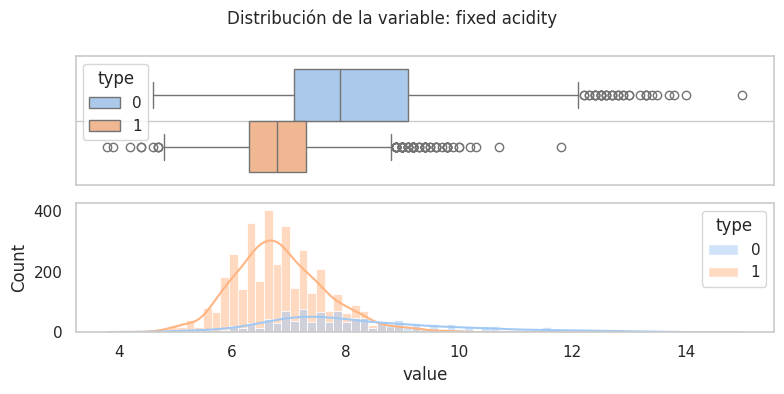

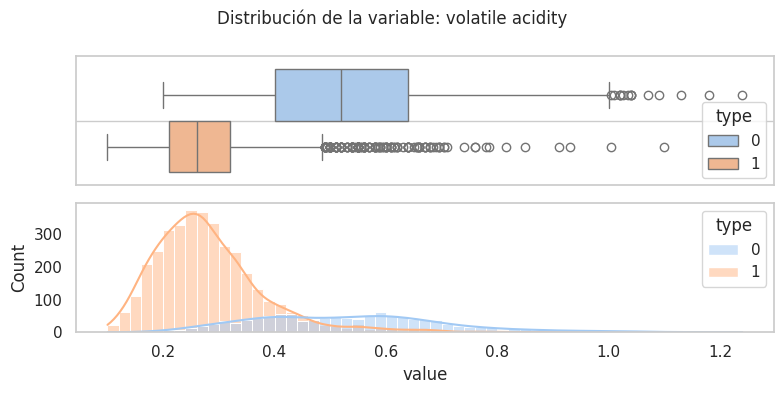

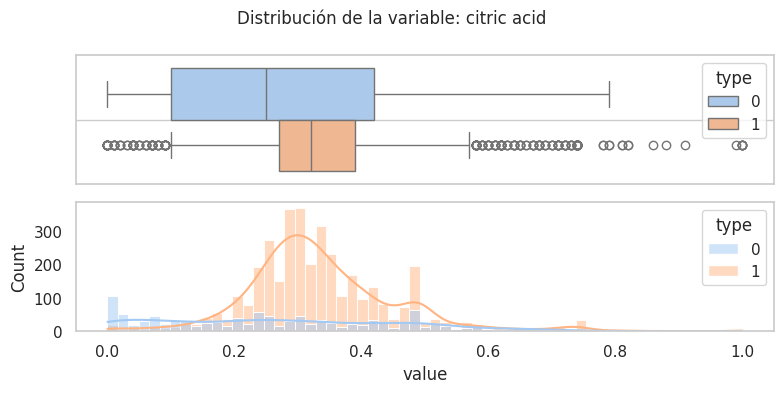

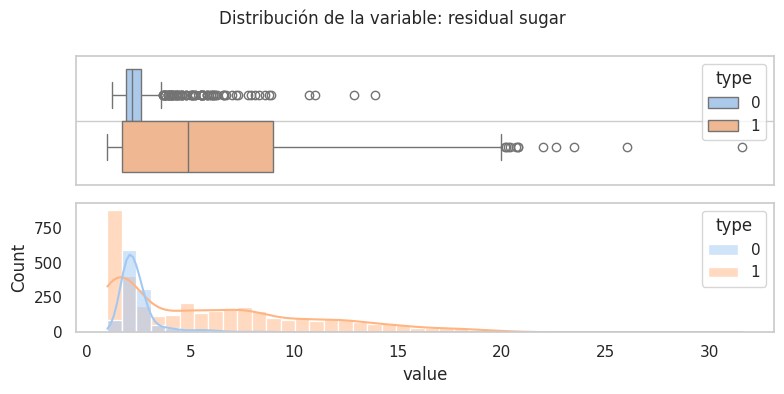

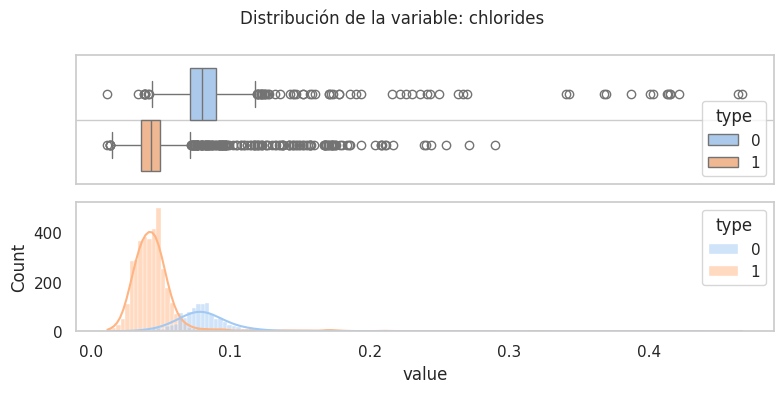

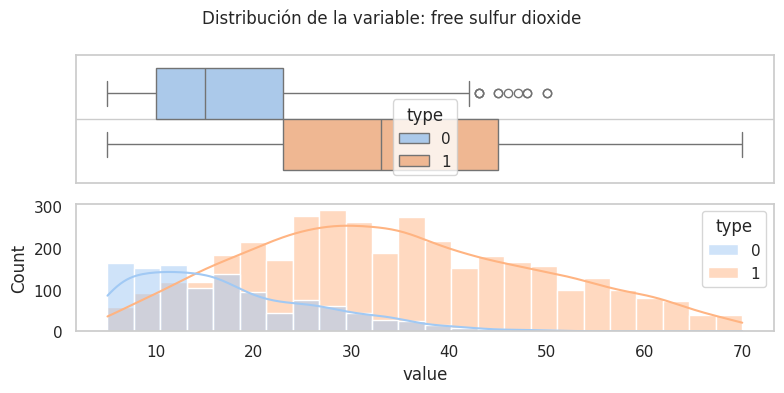

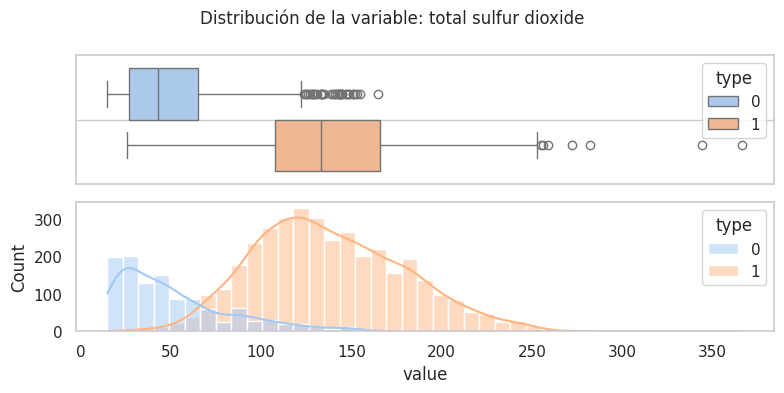

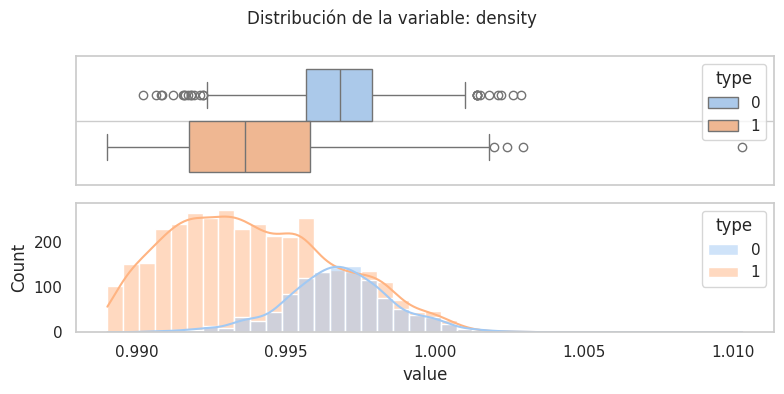

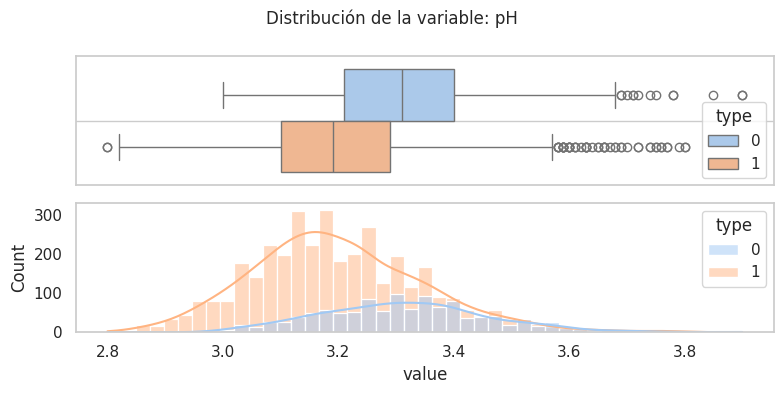

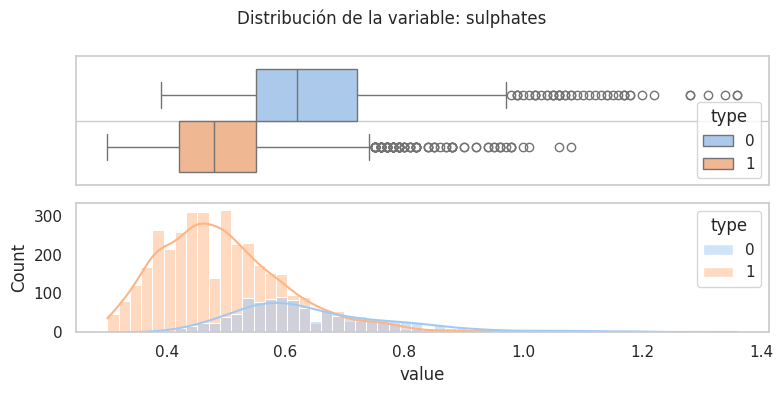

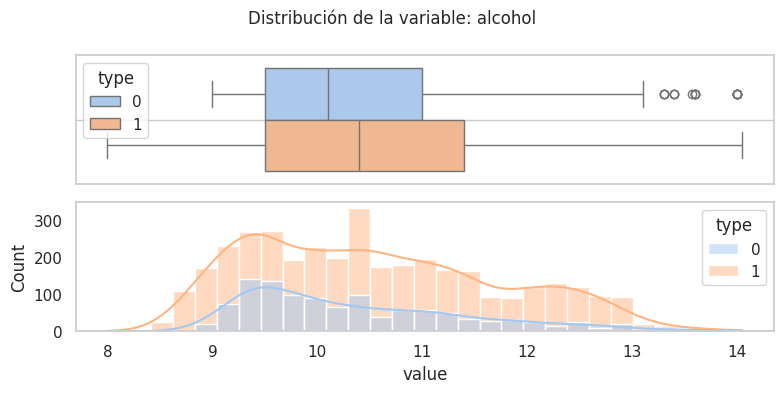

In [144]:
numerical_features = ['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
df_long = pd.melt(df, id_vars=['type'], value_vars=numerical_features, var_name='feature', value_name='value')
for _, feature in enumerate(numerical_features):
    fig, axes = plt.subplots(2, 1, figsize=(8, 4), sharex=True)
    fig.suptitle(f'Distribución de la variable: {feature}', fontsize=12)
    sns.boxplot(x=df[feature], hue=df['type'], ax=axes[0])
    #sns.histplot(df[feature], kde=True, ax=axes[1])  # Se usa histplot con kde=True para incluir la curva de densidad
    sns.histplot(data=df_long[df_long['feature'] == feature], x='value', hue='type', kde=True, ax=axes[1])
    axes[0].grid()
    axes[1].grid()
    plt.tight_layout() # Ajusta automáticamente la disposición de los elementos en una figura para que se ajusten correctamente y no se superpongan.
    plt.show()

💡 INSIGHTS

Si bien existen outliers para las variables bajo estudio, en general, los mismos se encuentran dentro del dominio esperado a excepción de los outliers asociados a los niveles de azufre que están por encima del valor máximo admisible. No obstante, según las averiguaciones realizadas los niveles de dióxido de azufre en vinos blancos europeos suelen estar por debajo de 250 partes por millón (ppm).

In [145]:
df_filtered = df[df['total sulfur dioxide'] > 250]
total_by_type = df_filtered.groupby('type').size().reset_index(name='count')
total_by_type

,type,count
0,1,13


In [166]:
df_filtered

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,gama,gamaNro
91,1,7.2,0.270,0.46,18.75,0.052,45.0,255.0,1.00000,3.04,0.52,8.9,5,Media,1
182,1,7.1,0.250,0.32,10.30,0.041,66.0,272.0,0.99690,3.17,0.52,9.1,6,Alta,2
320,1,7.1,0.270,0.31,18.20,0.046,55.0,252.0,1.00000,3.07,0.56,8.7,5,Media,1
597,1,7.0,0.210,0.34,8.50,0.033,31.0,253.0,0.99530,3.22,0.56,10.5,6,Alta,2
1075,1,6.7,0.180,0.30,6.40,0.048,40.0,251.0,0.99560,3.29,0.52,10.0,5,Media,1
1134,1,8.6,0.550,0.35,15.55,0.057,35.5,366.5,1.00010,3.04,0.63,11.0,3,Baja,0
1536,1,8.3,0.360,0.57,15.00,0.052,35.0,256.0,1.00010,2.93,0.64,8.6,5,Media,1
1673,1,9.1,0.330,0.38,1.70,0.062,50.5,344.0,0.99580,3.10,0.70,9.5,5,Media,1
1871,1,9.4,0.230,0.56,16.45,0.063,52.5,282.0,1.00098,3.10,0.51,9.3,5,Media,1
1886,1,6.3,0.695,0.55,12.90,0.056,58.0,252.0,0.99806,3.29,0.49,8.7,5,Media,1


In [146]:
# se calcula la proporción de valores atípicos respecto al total del dataset bajo estudio.
porcAtipicos = len(df_filtered) / len(df)
print(f"Los valores atípicos identificados representan el {porcAtipicos:.2f} % del dataset")

Los valores atípicos identificados representan el 0.00 % del dataset


Dado que la cantidad de registros identificados es poco significativa y se corresponden con registros de calidad media (donde se encuentran la mayoría de los registros), se procede a eliminarlos del conjunto de datos.

In [147]:
print("Dimensiones del dataset antes de la remoción de outliers: ", df.shape)
df = df.drop(df_filtered.index)
df = df.reset_index(drop=True)
print("Dimensiones del dataset luego de la remoción de outliers: ", df.shape)

Dimensiones del dataset antes de la remoción de outliers:  (4804, 15)
Dimensiones del dataset luego de la remoción de outliers:  (4791, 15)


### **🔹 Análisis de Distribución de los Datos**


Las **Pruebas de Normalidad** son esenciales para validar la aplicabilidad de muchos métodos estadísticos y asegurar la precisión de los resultados obtenidos.

Se trata de herramientas estadísticas utilizadas para determinar si un conjunto de datos sigue una distribución normal. La normalidad es un supuesto clave en muchos análisis estadísticos, ya que permite aplicar técnicas como pruebas de hipótesis, intervalos de confianza y modelos de regresión que dependen de esta distribución. Si los datos no son normales, puede ser necesario utilizar métodos no paramétricos que no requieren este supuesto.



Los **histogramas** son una excelente herramienta visual para evaluar la distribución de un conjunto de datos y determinar si se asemeja a una distribución normal (también conocida como distribución gaussiana).

Luego, para completar el análisis gráfico de normalidad se realiza un test estadístico de **Shapiro-Wilks** y **QQ-Plots**.

In [148]:
"""
numerical_features = ['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

for _, feature in enumerate(numerical_features):
    fig, axes = plt.subplots(2, 1, figsize=(8, 4), sharex=True)
    fig.suptitle(f'Distribución de la variable: {feature}', fontsize=12)
    sns.boxplot(x=df[feature], ax=axes[0])
    sns.histplot(df[feature], kde=True, ax=axes[1])  # Se usa histplot con kde=True para incluir la curva de densidad
    axes[0].grid()
    axes[1].grid()
    plt.tight_layout() # Ajusta automáticamente la disposición de los elementos en una figura para que se ajusten correctamente y no se superpongan.
    plt.show()
"""

"\nnumerical_features = ['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']\n\nfor _, feature in enumerate(numerical_features):\n    fig, axes = plt.subplots(2, 1, figsize=(8, 4), sharex=True)\n    fig.suptitle(f'Distribución de la variable: {feature}', fontsize=12)\n    sns.boxplot(x=df[feature], ax=axes[0])\n    sns.histplot(df[feature], kde=True, ax=axes[1])  # Se usa histplot con kde=True para incluir la curva de densidad\n    axes[0].grid()\n    axes[1].grid()\n    plt.tight_layout() # Ajusta automáticamente la disposición de los elementos en una figura para que se ajusten correctamente y no se superpongan.\n    plt.show()\n"

In [149]:
"""
# Se analizan en detalle las distribuciones según el tipo de vino.

numerical_features = ['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
df_long = pd.melt(df, id_vars=['type'], value_vars=numerical_features, var_name='feature', value_name='value')
for _, feature in enumerate(numerical_features):
    fig, axes = plt.subplots(2, 1, figsize=(8, 4), sharex=True)
    fig.suptitle(f'Distribución de la variable: {feature}', fontsize=12)
    sns.boxplot(x=df[feature], hue=df['type'], ax=axes[0])
    #sns.histplot(df[feature], kde=True, ax=axes[1])  # Se usa histplot con kde=True para incluir la curva de densidad
    sns.histplot(data=df_long[df_long['feature'] == feature], x='value', hue='type', kde=True, ax=axes[1])
    axes[0].grid()
    axes[1].grid()
    plt.tight_layout() # Ajusta automáticamente la disposición de los elementos en una figura para que se ajusten correctamente y no se superpongan.
    plt.show()
"""

"\n# Se analizan en detalle las distribuciones según el tipo de vino.\n\nnumerical_features = ['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']\ndf_long = pd.melt(df, id_vars=['type'], value_vars=numerical_features, var_name='feature', value_name='value')\nfor _, feature in enumerate(numerical_features):\n    fig, axes = plt.subplots(2, 1, figsize=(8, 4), sharex=True)\n    fig.suptitle(f'Distribución de la variable: {feature}', fontsize=12)\n    sns.boxplot(x=df[feature], hue=df['type'], ax=axes[0])\n    #sns.histplot(df[feature], kde=True, ax=axes[1])  # Se usa histplot con kde=True para incluir la curva de densidad\n    sns.histplot(data=df_long[df_long['feature'] == feature], x='value', hue='type', kde=True, ax=axes[1])\n    axes[0].grid()\n    axes[1].grid()\n    plt.tight_layout() # Ajusta automáticamente la disposición de los elementos en una figura para que se ajusten

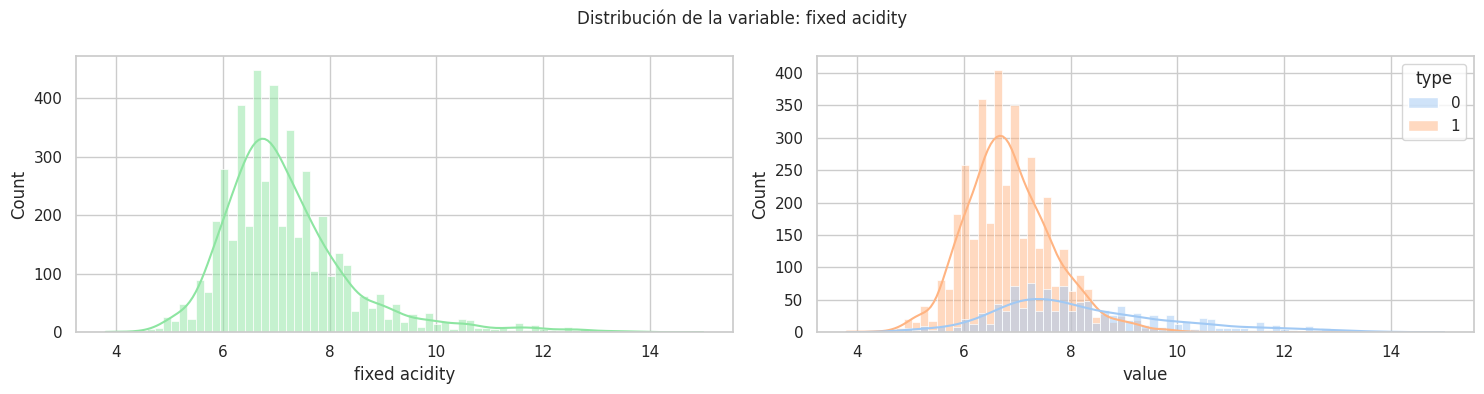

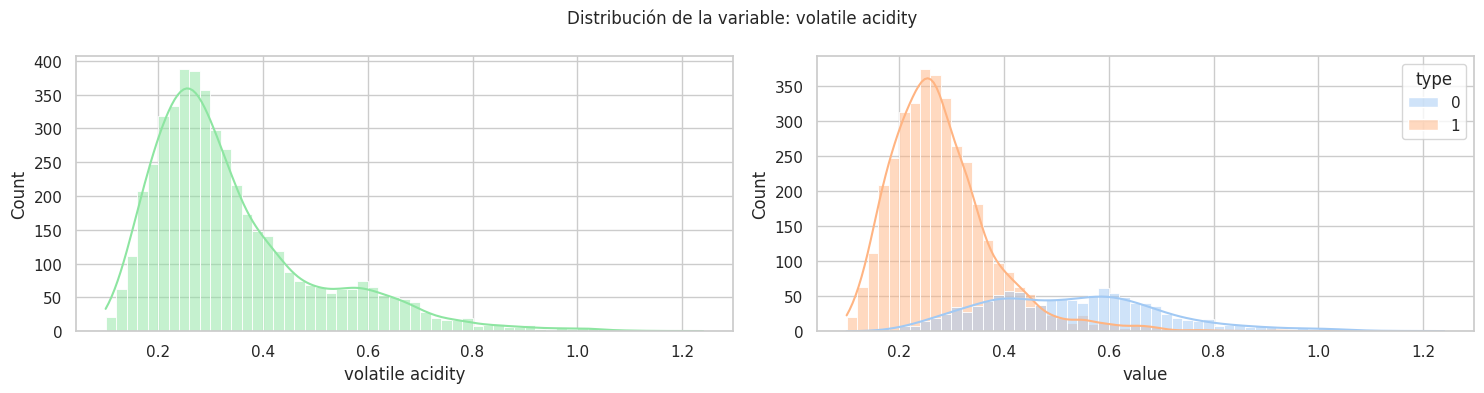

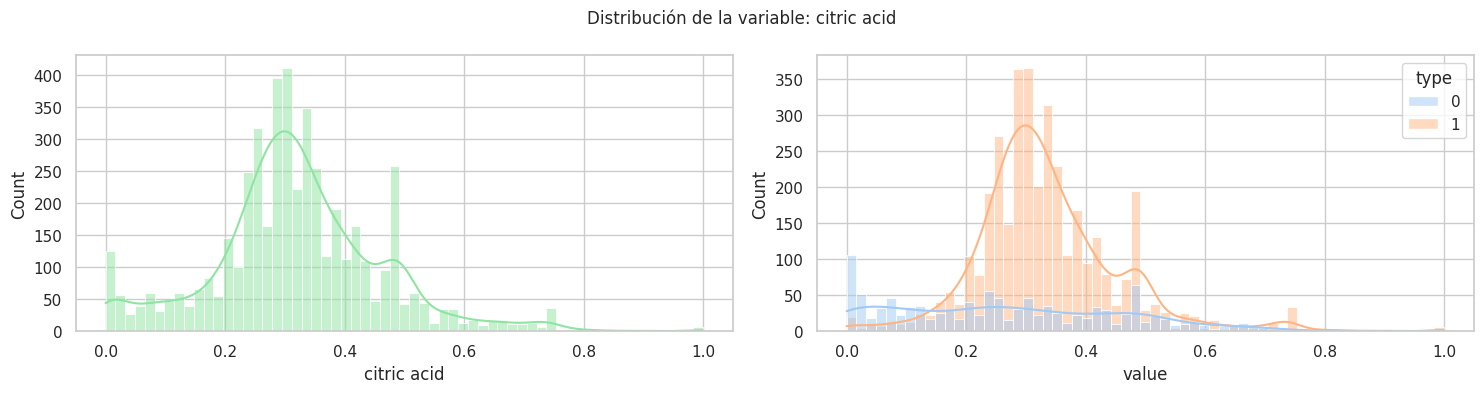

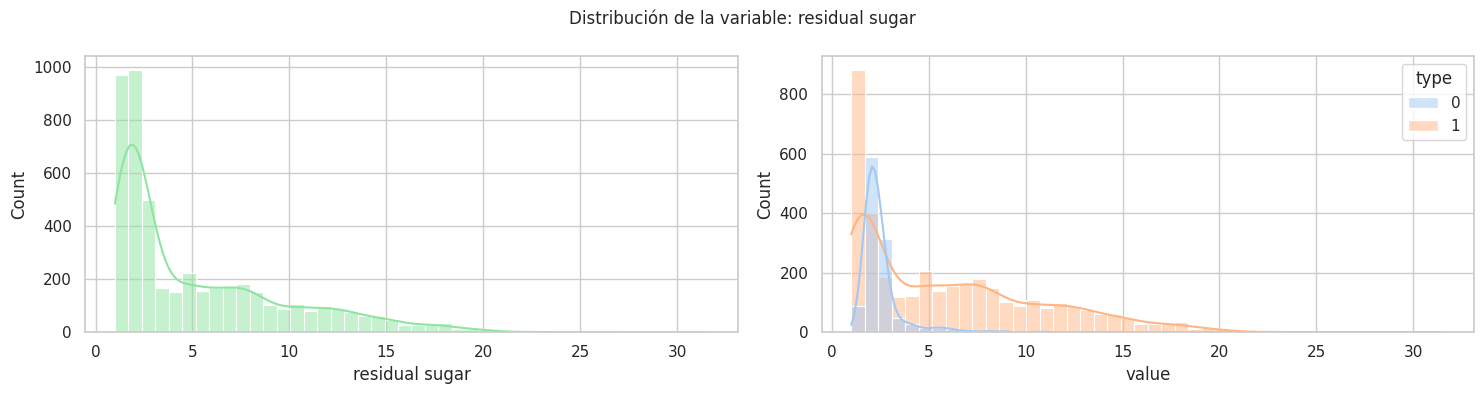

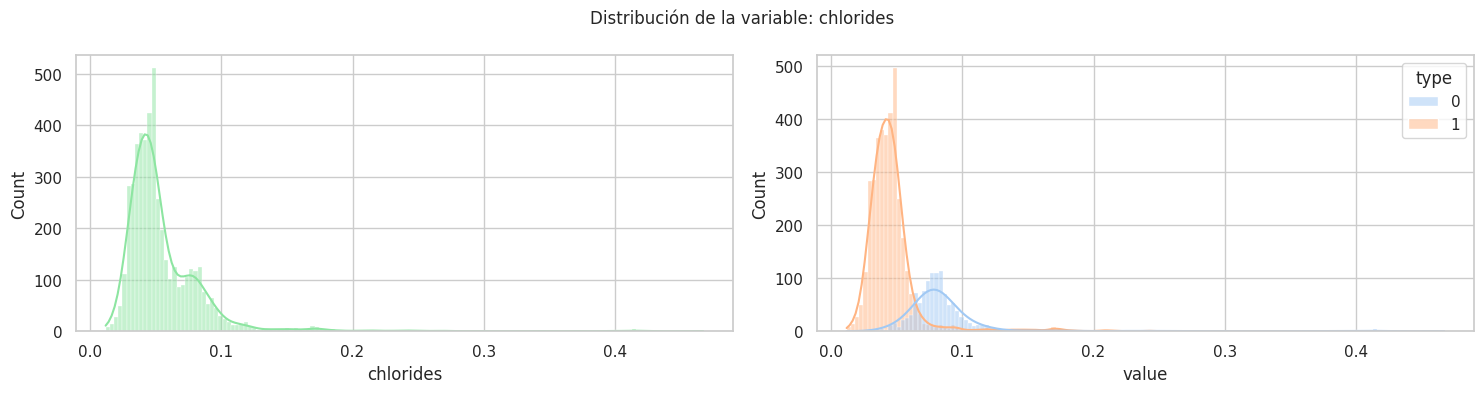

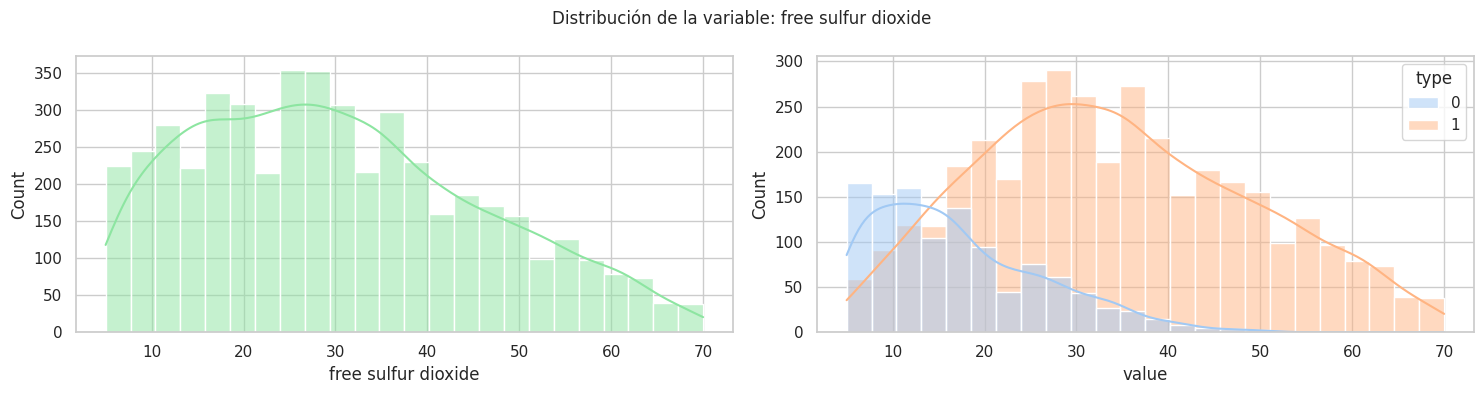

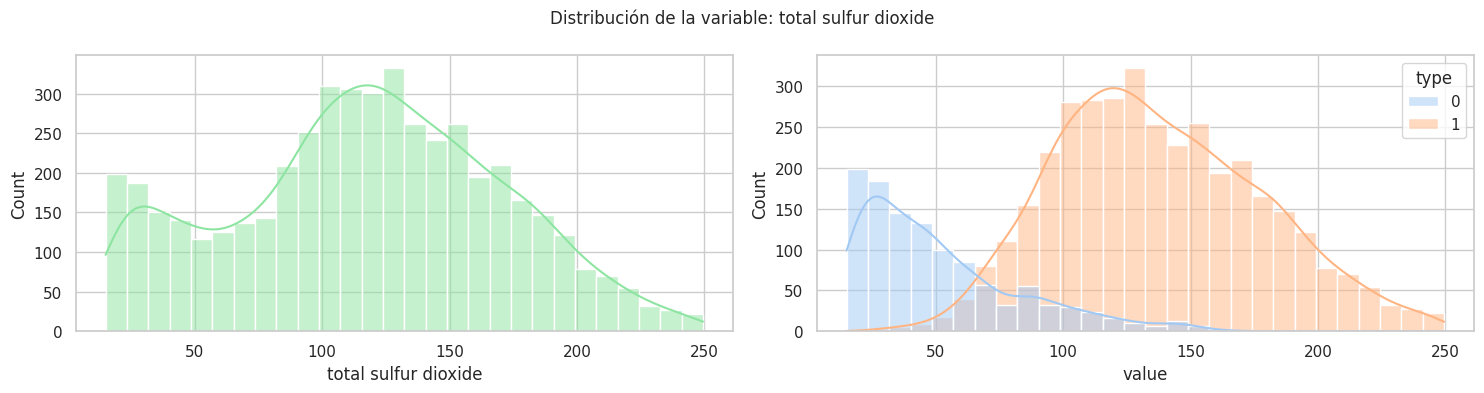

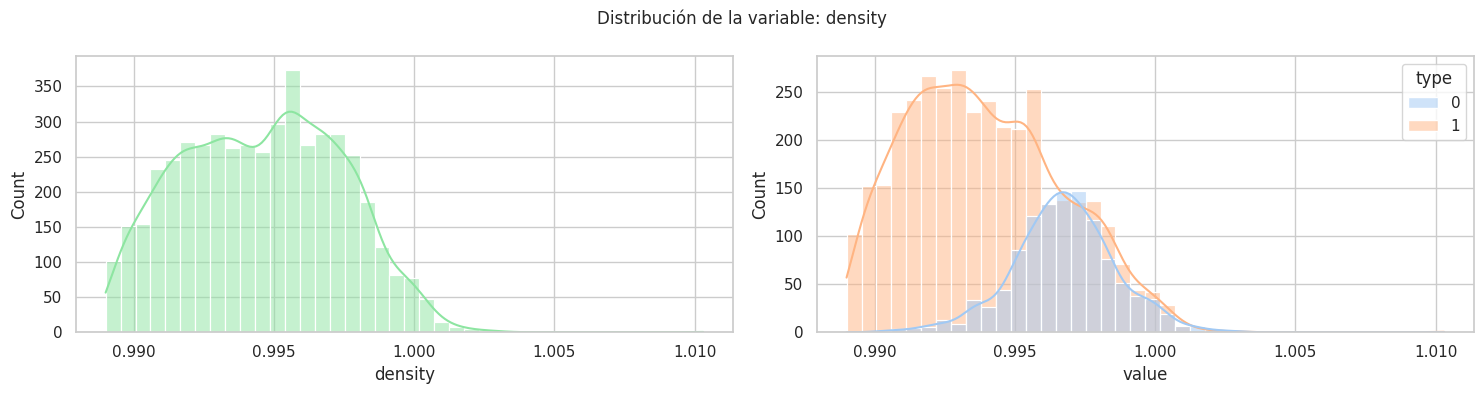

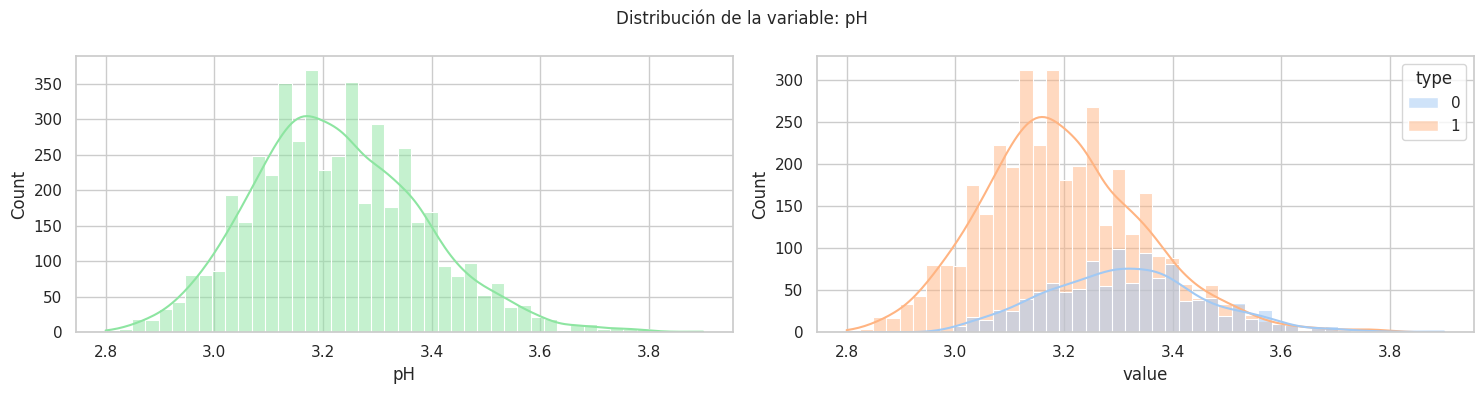

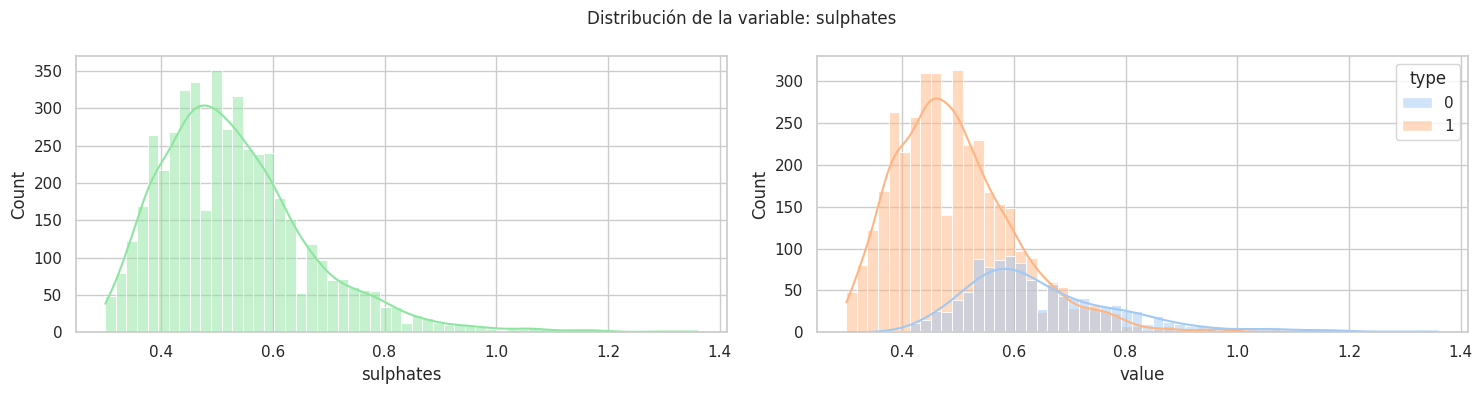

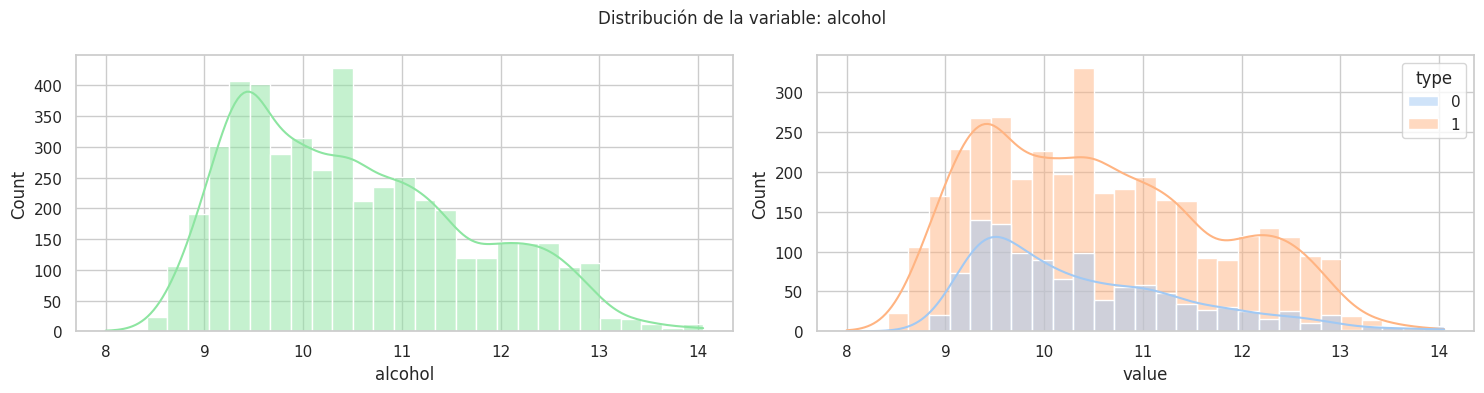

In [150]:
# Se analizan en detalle las distribuciones según el tipo de vino.

caracteristica = ['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
df_long = pd.melt(df, id_vars=['type'], value_vars=caracteristica, var_name='feature', value_name='value')
for _, feature in enumerate(caracteristica):
    fig, axes = plt.subplots(1, 2, figsize=(15, 4), sharex=True)
    fig.suptitle(f'Distribución de la variable: {feature}', fontsize=12)
    sns.histplot(data=df[feature], kde=True, color='#8DE5A1', ax=axes[0])  # kde=True para incluir la curva de densidad
    sns.histplot(data=df_long[df_long['feature'] == feature], x='value', hue='type', kde=True, ax=axes[1])
    plt.tight_layout()
    plt.show()

In [151]:
"""
# Se analizan en detalle las distribuciones según el tipo de vino.

numerical_features = ['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
df_long = pd.melt(df, id_vars=['type'], value_vars=numerical_features, var_name='feature', value_name='value')
for _, feature in enumerate(numerical_features):
    fig, axes = plt.subplots(2, 2, figsize=(16, 4), sharex=True)
    fig.suptitle(f'Distribución de la variable: {feature}', fontsize=12)
    sns.boxplot(x=df[feature], color='#8DE5A1', ax=axes[0,0])
    sns.boxplot(x=df[feature], hue=df['type'], ax=axes[0,1])
    sns.histplot(df[feature], kde=True, color='#8DE5A1', ax=axes[1,0])  # Se usa histplot con kde=True para incluir la curva de densidad
    sns.histplot(data=df_long[df_long['feature'] == feature], x='value', hue='type', kde=True, ax=axes[1,1])
    #axes[0].grid()
    #axes[1].grid()
    plt.tight_layout() # Ajusta automáticamente la disposición de los elementos en una figura para que se ajusten correctamente y no se superpongan.
    plt.show()
"""

"\n# Se analizan en detalle las distribuciones según el tipo de vino.\n\nnumerical_features = ['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']\ndf_long = pd.melt(df, id_vars=['type'], value_vars=numerical_features, var_name='feature', value_name='value')\nfor _, feature in enumerate(numerical_features):\n    fig, axes = plt.subplots(2, 2, figsize=(16, 4), sharex=True)\n    fig.suptitle(f'Distribución de la variable: {feature}', fontsize=12)\n    sns.boxplot(x=df[feature], color='#8DE5A1', ax=axes[0,0])\n    sns.boxplot(x=df[feature], hue=df['type'], ax=axes[0,1])\n    sns.histplot(df[feature], kde=True, color='#8DE5A1', ax=axes[1,0])  # Se usa histplot con kde=True para incluir la curva de densidad\n    sns.histplot(data=df_long[df_long['feature'] == feature], x='value', hue='type', kde=True, ax=axes[1,1])\n    #axes[0].grid()\n    #axes[1].grid()\n    plt.tight_layout() # 

-----------------
Mediante la **Prueba de Shapiro-Wilks** se mide el grado de ajuste existente entre la distribución del conjunto de datos analizados y una distribución normal. El objetivo es validar si los datos provienen de una población tienen la distribución teórica especificada contrastando si las observaciones podrían razonablemente proceder de una distribución gaussiana.

Esta prueba estadística contrasta la hipótesis nula con la hipótesis alternativa, siendo:
- **Ho:** Los datos provienen de una distribución normal.
- **Ha:** Los datos no siguen una distribución normal.

Se evalúa el nivel de significancia (0,05), tal que:
- si **p-value <= 0,05** se rechaza la hipótesis nula, sugiriendo que la distribución de los datos no es normal.
- si **p-value > 0,05** no se puede rechazar la hipótesis nula, sugiriendo que los datos siguen una distribución normal.

--------
##### **NOTA:** Este método es adecuado para muestras pequeñas y medianas. Las **pruebas de normalidad**, son pruebas poco potentes cuando el tamaño de la muestra es pequeño (n <= 30). Al basarse en la hipótesis nula de normalidad, podemos no alcanzar significación estadística por falta de potencia estadística, asumiendo erróneamente que los datos siguen una distribución normal (al no poder rechazar la hipótesis nula). Por otra parte, cuando la muestra es muy grande (n > 30), ocurre lo contrario: será suficiente una pequeña desviación de la normalidad para que la prueba nos dé una p significativa y rechacemos la hipótesis nula, cuando la mayor parte de las técnicas paramétricas tolerarían pequeñas desviaciones de la normalidad si la muestra es grande. Aunque, para estos casos aplica el ***Teorema Central del Límite*** que indica que cuando se extraen muestras de tamaño mayor a 30, la distribución muestral de medias tiene un comportamiento aproximadamente normal.
---------

💡 INSIGHTS

De la observación de los histogramas pareciera que las siguientes variables siguen una distribución normal:
- "fixed acidity" en vino blancos (type = 1)
- "chlorides" en vino blancos (type = 1)
- "density" en vino tintos (type = 0)
- "pH" en vino tintos (type = 0)

In [152]:
# Se arma un diciconario con las variables por tipo a analizar con el test estadístico
diccionario = {'fixed acidity':1, 'chlorides':1, 'density':0, 'pH':0}

In [153]:
# Se aplica el test de Shapiro-Wilks a las variables identificadas

# Test de Shapiro
for clave, valor in diccionario.items():
  if diccionario[clave] == 1:
      shapiro_test = shapiro(df_white[clave])
      vino = "blanco"
  else:
      shapiro_test = shapiro(df_red[clave])
      vino = "tinto"
  shapiro_pvalue = shapiro_test.pvalue
  distribucion = lambda shapiro_pvalue: 'es Normal' if shapiro_pvalue > 0.05 else 'NO es Normal'
  resultado = distribucion(shapiro_pvalue)
  print(f'El p-value de "{clave}" (para vino {vino}) es {shapiro_pvalue}, por lo tanto la distribución {resultado}.')


El p-value de "fixed acidity" (para vino blanco) es 3.226072373647057e-26, por lo tanto la distribución NO es Normal.
El p-value de "chlorides" (para vino blanco) es 3.1522304913026305e-71, por lo tanto la distribución NO es Normal.
El p-value de "density" (para vino tinto) es 1.8043209191584517e-06, por lo tanto la distribución NO es Normal.
El p-value de "pH" (para vino tinto) es 2.420898102121493e-06, por lo tanto la distribución NO es Normal.


-----------------
El **QQ-Plot** es un gráfico que también nos permite analizar la normalidad de los datos mediante la comparación de cuantiles. Permite comparar la distribución de un conjunto de datos con una distribución teórica, como la distribución normal.

De esta manera, si los datos siguen una distribución normal, se alinearán cerca de la diagonal del gráfico. Cuanto más se alejen, menos probable será que nuestros datos sigan una distribución normal.

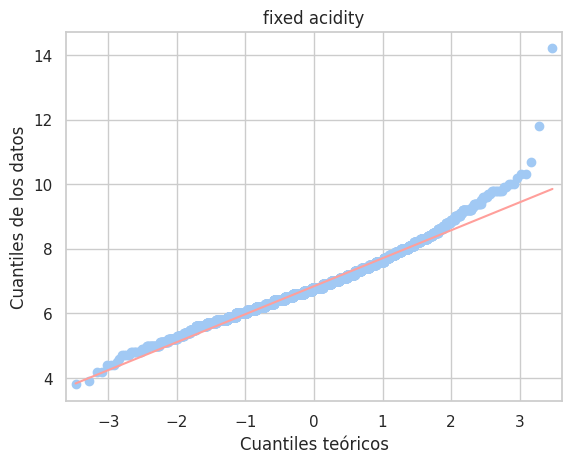

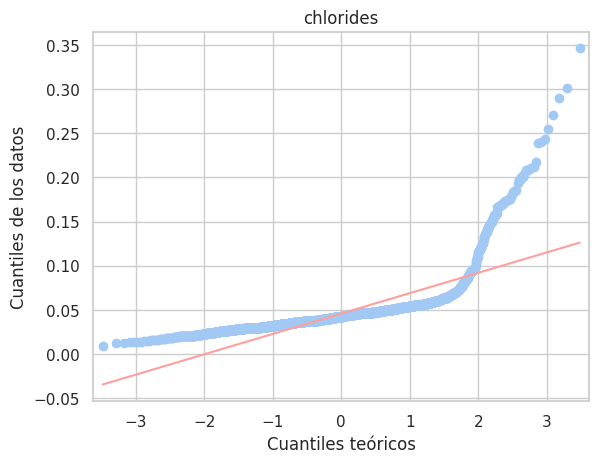

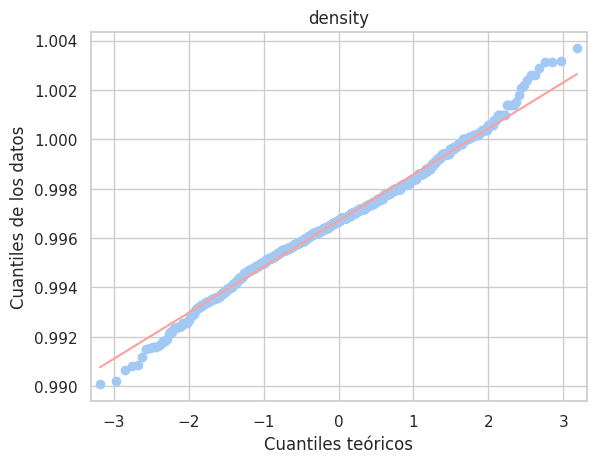

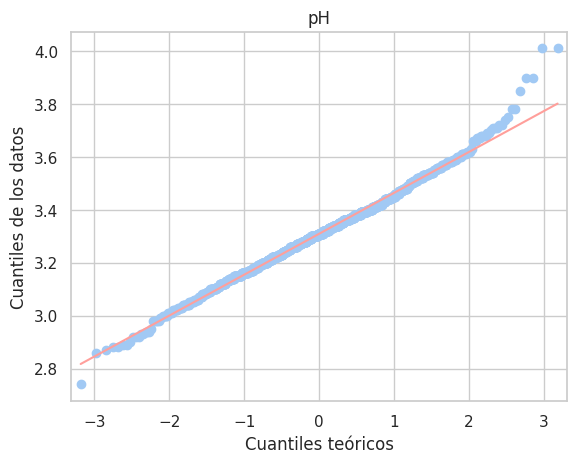

In [154]:
# QQ plot para complementar el test estadístico

for clave, valor in diccionario.items():

  if diccionario[clave] == 1:
    sm.qqplot(df_white[clave], line='s')
    vino = "blanco"
  else:
    sm.qqplot(df_red[clave], line='s')
    vino = "tinto"

  plt.xlabel('Cuantiles teóricos')
  plt.ylabel('Cuantiles de los datos')
  plt.title(clave)
  plt.show()

💡 INSIGHTS

Del análisis de los QQ-Plots se concluye que:
- La variable **"fixed acidity"** para los vinos blancos no sigue una distribución normal dado que la cola superior (extremo) del gráfico se desvía significativamente de la línea recta.
- La variable **"chlorides"** para los vinos blancos no sigue la línea recta diagonal de la distribución normal.
- Las variables **"density"** y **"pH"** para los vinos tintos se aproximan a la distribución normal (aunque los puntos extremos del gráfico se desvían levemente de la línea recta diagonal).

Considerando que los datos que tienen una distribución normal, donde la media +/- 3*DS (Desviaciiones estándar) captura el 99,7 % de las observaciones, se analizan las variables que se aproximan a la normal (según el análisis del apartado anterior). De esta manera, cualquier valor que quede fuera del rango mencionado se considerarán una anomalía.

In [155]:
# Se arma un diciconario con las variables que se aproximan a la distribución normal
variablesNormales = {'density':0, 'pH':0}

In [156]:
# Se calcula el z-score para identificar outliers

totalOutliers = pd.DataFrame()

for clave, valor in variablesNormales.items():

  if variablesNormales[clave] == 1: # vino = "blanco"
    df_white["variableZ"] = (df_white[clave] - df_white[clave].mean())/df_white[clave].std()
    df_white["Outlier"] = 0
    df_white.loc[(df_white["variableZ"]>3)|(df_white["variableZ"]<-3) , "Outlier"] = 1
    Outliers = df_white

  else: # vino = "tinto"
    df_red["variableZ"] = (df_red[clave] - df_red[clave].mean())/df_red[clave].std()
    df_red["Outlier"] = 0
    df_red.loc[(df_red["variableZ"]>3)|(df_red["variableZ"]<-3) , "Outlier"] = 1
    Outliers = df_red

  # Se agrega una columna para identificar la variable
  Outliers['variable'] = clave
  Outliers['type'] = valor

  # se concatenan  los resultados
  totalOutliers = pd.concat([totalOutliers, Outliers], ignore_index=True)

resultadoOutliers = totalOutliers.groupby(["variable", "type", "Outlier"]).size().reset_index(name='count')

resultadoOutliers

,variable,type,Outlier,count
0,density,0,0,1346
1,density,0,1,13
2,pH,0,0,1351
3,pH,0,1,8


In [157]:
# Se listan los valores outliers

outliersZ = totalOutliers[totalOutliers['Outlier'] == 1]
outliersZ

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,...,chlorides_O,free_sulfur_dioxide_O,total_sulfur_dioxide_O,density_O,pH_O,sulphates_O,alcohol_O,variableZ,Outlier,variable
385,0,15.6,0.685,0.76,3.70,0.100,6.0,43.0,1.00320,2.95,...,NO,NO,NO,NO,SI,NO,NO,3.473162,1,density
420,0,10.6,0.280,0.39,15.50,0.069,6.0,23.0,1.00260,3.12,...,NO,NO,NO,NO,NO,NO,NO,3.152121,1,density
483,0,15.5,0.645,0.49,4.20,0.095,10.0,23.0,1.00315,2.92,...,NO,NO,NO,NO,SI,NO,NO,3.446409,1,density
485,0,15.6,0.645,0.49,4.20,0.095,10.0,23.0,1.00315,2.92,...,NO,NO,NO,NO,SI,NO,NO,3.446409,1,density
528,0,10.1,0.650,0.37,5.10,0.110,11.0,65.0,1.00260,3.32,...,NO,NO,NO,NO,NO,NO,NO,3.152121,1,density
722,0,6.7,0.280,0.28,2.40,0.012,36.0,100.0,0.99064,3.26,...,NO,NO,NO,NO,NO,NO,NO,-3.247307,1,density
764,0,10.7,0.900,0.34,6.60,0.112,23.0,99.0,1.00289,3.22,...,NO,NO,NO,NO,NO,NO,NO,3.307291,1,density
866,0,8.0,0.180,0.37,0.90,0.049,36.0,109.0,0.99007,2.89,...,NO,NO,NO,NO,SI,NO,NO,-3.552296,1,density
948,0,5.0,0.400,0.50,4.30,0.046,29.0,80.0,0.99020,3.49,...,NO,NO,NO,NO,NO,NO,NO,-3.482737,1,density
1081,0,5.5,0.490,0.03,1.80,0.044,28.0,87.0,0.99080,3.50,...,NO,NO,NO,NO,NO,NO,NO,-3.161696,1,density


In [158]:
# se calcula la proporción de valores atípicos respecto al total del dataset bajo estudio.
porcAtipicos = len(outliersZ) / len(df)
print(f"Los valores atípicos identificados representan el {porcAtipicos:.3f} % del dataset")

Los valores atípicos identificados representan el 0.004 % del dataset


Dado que la cantidad de registros identificados no es significativa se procede a eliminarlos del conjunto de datos

In [159]:
print("Dimensiones del dataset antes de la remoción de outliers: ", df.shape)
df = df[~df.index.isin(outliersZ.index)]
print("Dimensiones del dataset luego de la remoción de outliers: ", df.shape)

Dimensiones del dataset antes de la remoción de outliers:  (4791, 15)
Dimensiones del dataset luego de la remoción de outliers:  (4770, 15)


Para aquellas variables que no siguen una distribución normal se debe emplear métodos no paramétricos para la identificación de outliers. En este caso se analizarán los Sulfitos.

### **🔹 Análisis de corelación**

Analizo la correlación de las variables por tipo de vino.

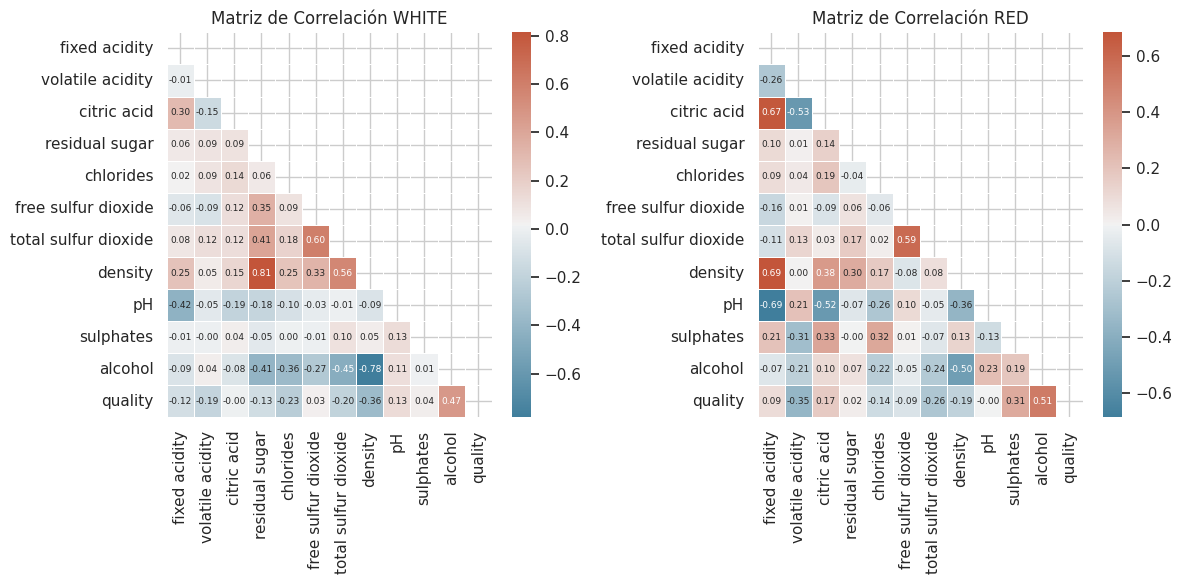

In [160]:
# Elimino las columnas que no deseo correlacionar (o son categóricas) del DataFrame a correlacionar
df_corr = df.drop(['gama', 'gamaNro'], axis=1)

# Separo los datos por tipo de vino
dfWhite = df_corr[df_corr['type'] == 1]
dfWhite = dfWhite.drop(['type'], axis=1)
dfRed = df_corr[df_corr['type'] == 0]
dfRed = dfRed.drop(['type'], axis=1)

# Genero las matrices de correlación
dfWhiteCorr = dfWhite.corr()
dfRedCorr = dfRed.corr()

f, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))                  # Define el lienzo de la visualización
cmap = sns.diverging_palette(230, 20, as_cmap=True)                 # Define el mapa de colores

# Genero los mapas de calor por tipo de vino
# WHITE
mask = np.triu(np.ones_like(dfWhiteCorr, dtype=bool))               # Máscara para la parte superior del mapa de calor
sns.heatmap(dfWhiteCorr, mask=mask, cmap=cmap, linewidths=.5, fmt='.2f', annot=True, annot_kws={'size': 6.5}, ax=ax1)
ax1.set_title('Matriz de Correlación WHITE')
# RED
mask = np.triu(np.ones_like(dfRedCorr, dtype=bool))                 # Máscara para la parte superior del mapa de calor
sns.heatmap(dfRedCorr, mask=mask, cmap=cmap, linewidths=.5, fmt='.2f', annot=True, annot_kws={'size': 6.5}, ax=ax2)
ax2.set_title('Matriz de Correlación RED')

plt.tight_layout() # Ajusta automáticamente la disposición de los elementos en una figura para que se ajusten correctamente y no se superpongan.
plt.show()

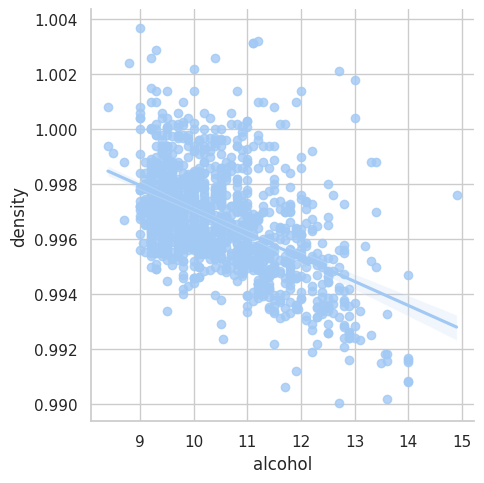

In [175]:
# Se puede ver en detalle la correlación entre el alcohol y la densidad de los vinos blancos.

lmplot(x='alcohol', y='density', data=df_red, fit_reg=True)

💡 INSIGHTS

Se observa mayor correlación positiva entre las siguientes variables:
* "free sulfur dioxide" y "total sulfur dioxide": Esto es así ya que el dióxido de azufre total incluye tanto el libre como el combinado
* "density" y "residual sugar" en vinos blancos: Esto es así dado que la densidad del vino tiende a aumentar con el contenido de azúcar residual, ya que el azúcar contribuye al peso del líquido.

Del mismo modo, hay una mayor correlación negativa entre:
* "pH" y "Fixed Acidity": ya que un mayor contenido de acidez fija generalmente resulta en un pH más bajo.
* "alcohol" y "density": ya que a mayores concentraciones de alcohol se aligera la densidad del vino.

Por su parte, llaman la atención:
* La ausencia de una marcada correlación entre "Sulphates" y "Alcohol" ya que los sulfitos se utilizan para estabilizar el vino y prevenir la oxidación, lo cual es importante en vinos con mayor contenido de alcohol.

# **🟡 PENDIENTE !!!!!!**
## **🔹 Feature Eng - Escalado: estandarización de los datos**
---

Ver clase Complementaria del 31/10, minuto 45.
Se debe hacer LUEGO de remover outliers.
Para variables numéricas


### **CONCLUSIONES**

El análisis del dataset de vinos revela varias características importantes.

* Se identificaron y eliminaron outliers, representando un pequeño porcentaje del total de datos.  
* Se evaluó la normalidad de las distribuciones de las variables numéricas utilizando histogramas, test de Shapiro-Wilk y QQ-plots. Si bien algunas variables mostraron cierta aproximación a la normalidad (ej: density y pH en vinos tintos), la mayoría no la cumplieron.
* Se detectaron y eliminaron outliers adicionales basados en el z-score para variables que se acercaban a la distribución normal.
* Finalmente, el análisis de correlación evidenció relaciones esperadas entre variables como el dióxido de azufre libre y total, y la densidad y el azúcar residual en vinos blancos, así como correlaciones negativas entre pH y acidez fija, y entre alcohol y densidad.  La ausencia de una correlación significativa entre sulfatos y alcohol es destacable.
